<a href="https://colab.research.google.com/github/MrKatze07/MLP_Dicoding_StudentPerformance/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Fikri_Haikal_Fadzillah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
    https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Library Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# Checks Dataset
student_df = pd.read_csv('StudentsPerformance.csv')
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Structure Dataset & Check Missing Values
data_info = {
    "info": student_df.info(),
    "shape": student_df.shape,
    "dtypes": student_df.dtypes,
    "missing_values": student_df.isnull().sum()
}
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


{'info': None,
 'shape': (1000, 8),
 'dtypes': gender                         object
 race/ethnicity                 object
 parental level of education    object
 lunch                          object
 test preparation course        object
 math score                      int64
 reading score                   int64
 writing score                   int64
 dtype: object,
 'missing_values': gender                         0
 race/ethnicity                 0
 parental level of education    0
 lunch                          0
 test preparation course        0
 math score                     0
 reading score                  0
 writing score                  0
 dtype: int64}

In [4]:
student_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [5]:
# Descriptive Statistics
numerical_cols = ['math score', 'reading score', 'writing score']
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
desc_statsnum = student_df[numerical_cols].describe()
desc_statscat = student_df[categorical_cols].describe()

desc_statsnum.describe()

,math score,reading score,writing score
count,8.000000,8.000000,8.000000
mean,172.656510,176.096149,174.874957
std,335.867642,334.200472,334.802567
min,0.000000,14.600192,10.000000
25%,46.540770,48.500000,47.111414
50%,66.044500,69.584500,68.527000
75%,82.750000,84.250000,84.250000
max,1000.000000,1000.000000,1000.000000


In [6]:
desc_statscat.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,4,4,4,4,4
unique,4,4,4,4,4
top,1000,1000,1000,1000,1000
freq,1,1,1,1,1


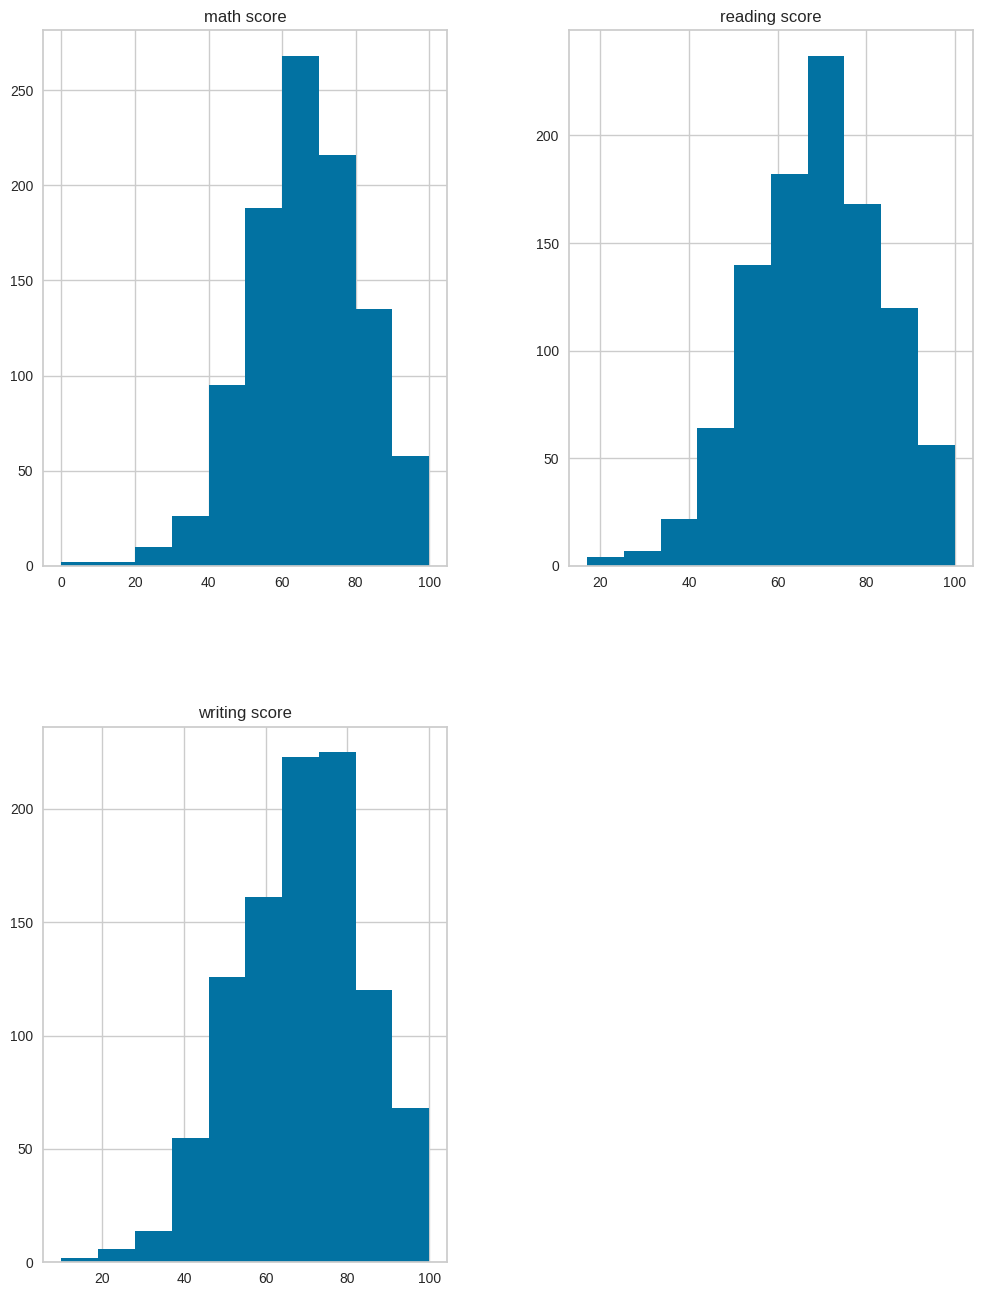

In [7]:
# Visualizations Dataset
student_df.hist(figsize=(12, 16))
plt.show()

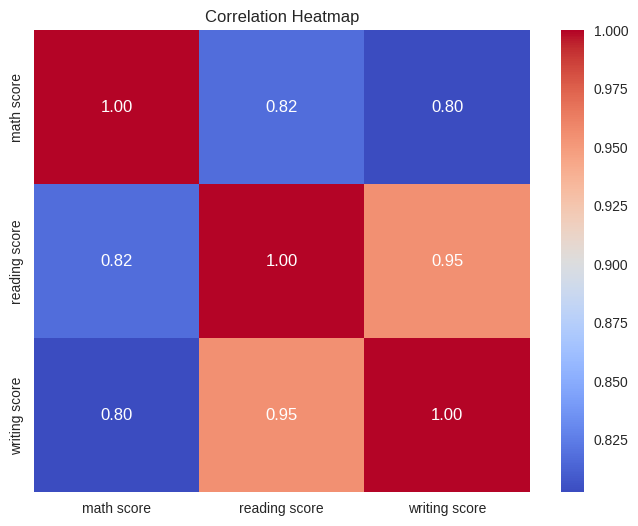

In [8]:
# Correlation Variables
correlation_matrix = student_df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Mean values grouped by gender:
         reading score  math score  writing score
gender                                          
female      72.608108   63.633205      72.467181
male        65.473029   68.728216      63.311203


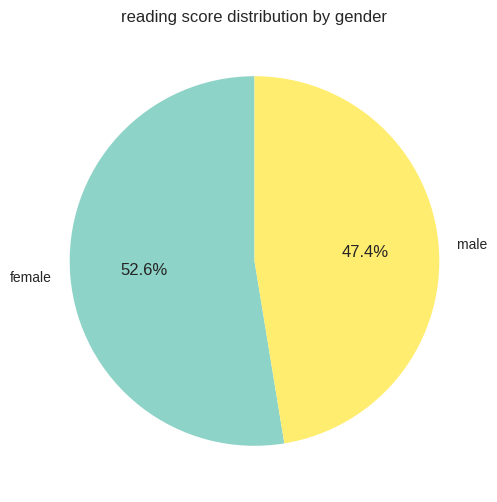

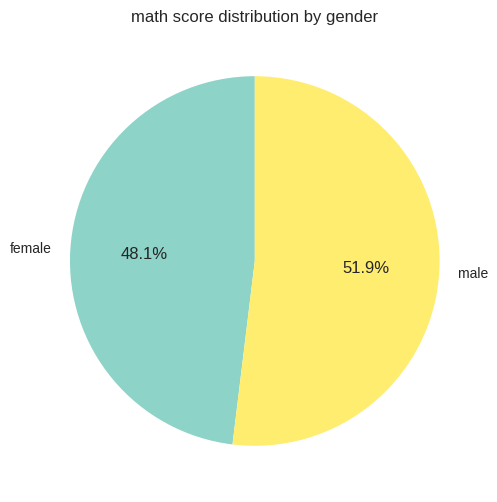

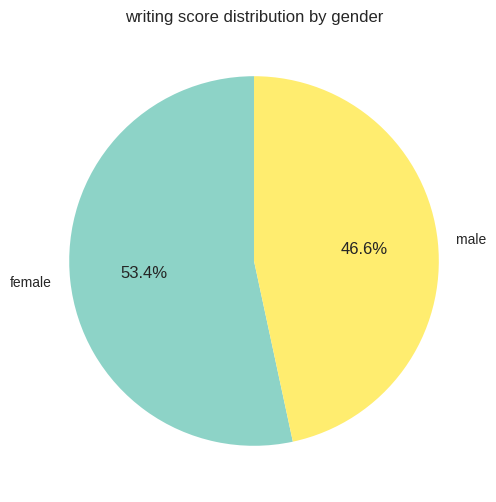


Mean values grouped by race/ethnicity:
                 reading score  math score  writing score
race/ethnicity                                          
group A             64.674157   61.629213      62.674157
group B             67.352632   63.452632      65.600000
group C             69.103448   64.463950      67.827586
group D             70.030534   67.362595      70.145038
group E             73.028571   73.821429      71.407143


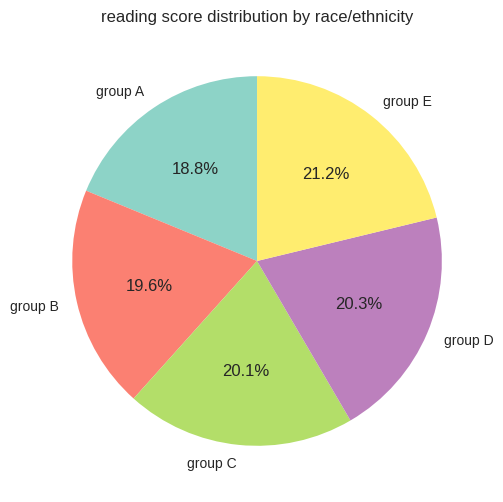

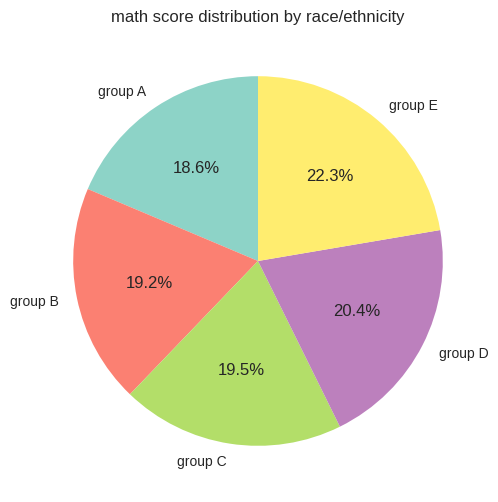

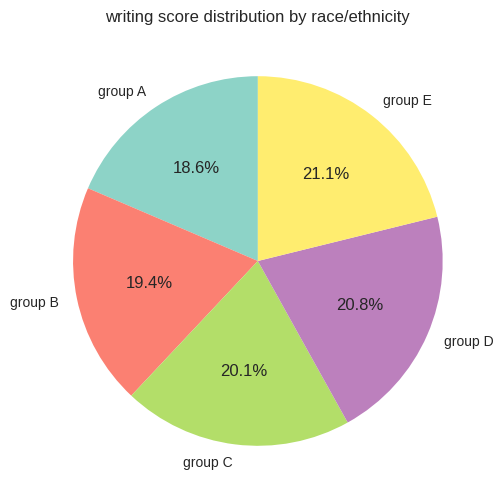


Mean values grouped by parental level of education:
                              reading score  math score  writing score
parental level of education                                          
associate's degree               70.927928   67.882883      69.896396
bachelor's degree                73.000000   69.389831      73.381356
high school                      64.704082   62.137755      62.448980
master's degree                  75.372881   69.745763      75.677966
some college                     69.460177   67.128319      68.840708
some high school                 66.938547   63.497207      64.888268


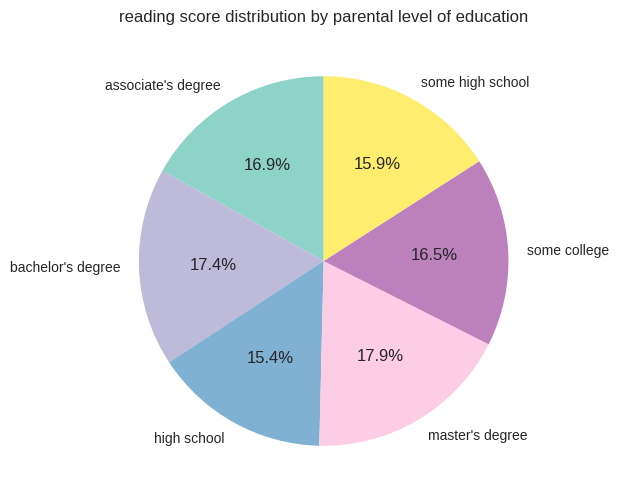

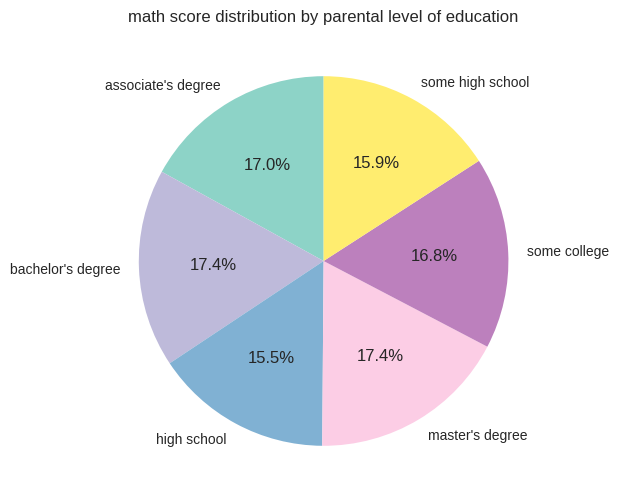

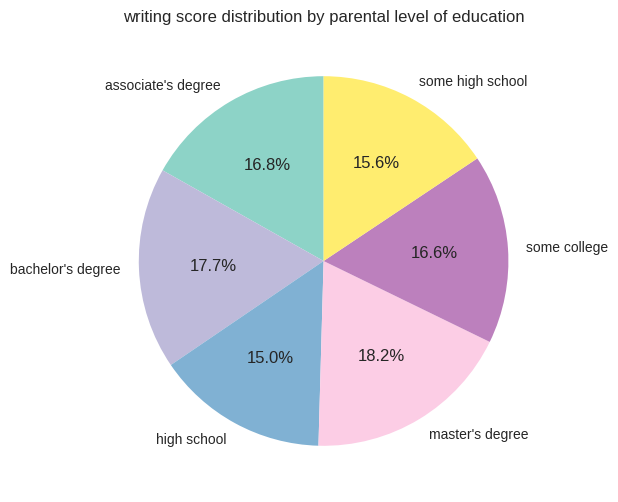


Mean values grouped by lunch:
               reading score  math score  writing score
lunch                                                 
free/reduced      64.653521   58.921127      63.022535
standard          71.654264   70.034109      70.823256


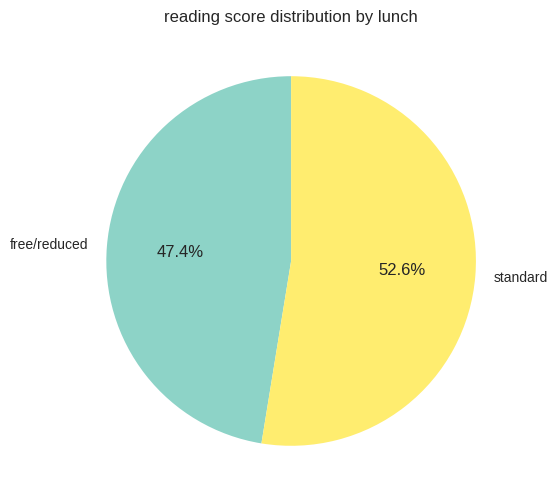

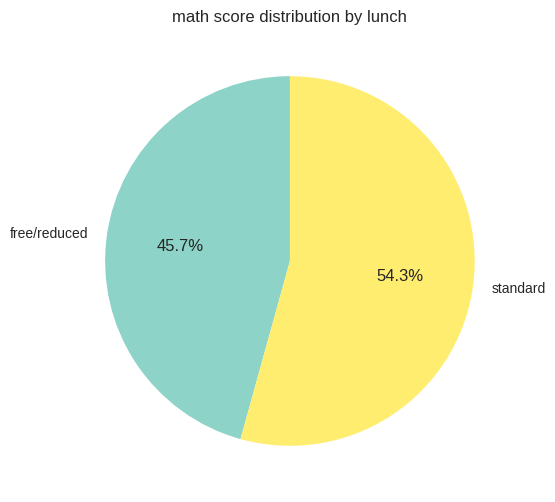

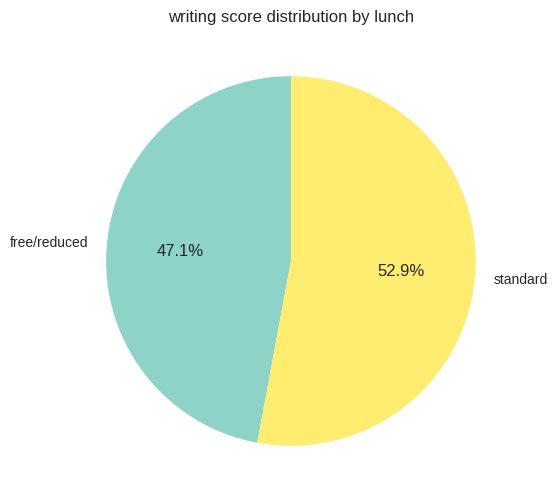


Mean values grouped by test preparation course:
                          reading score  math score  writing score
test preparation course                                          
completed                    73.893855   69.695531      74.418994
none                         66.534268   64.077882      64.504673


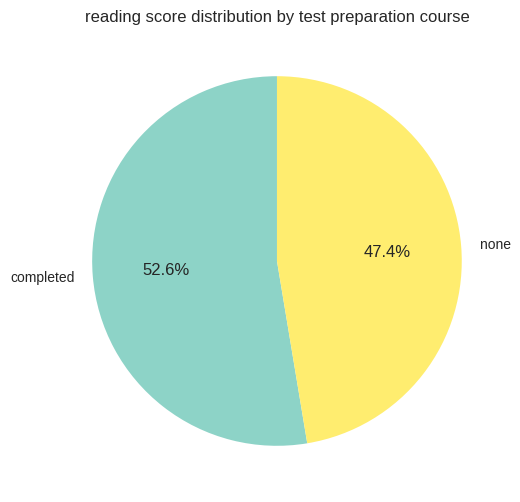

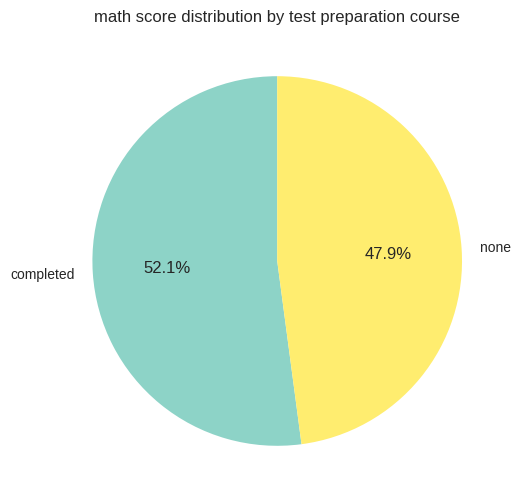

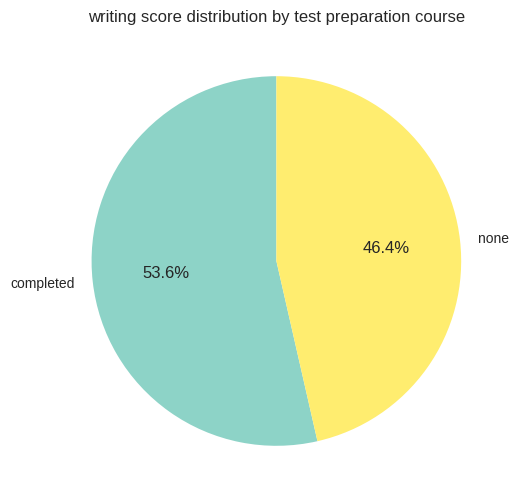

In [9]:
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical_cols = ['reading score', 'math score', 'writing score']

for cat_col in categorical_cols:
    grouped_means = student_df.groupby(cat_col)[numerical_cols].mean()
    print(f"\nMean values grouped by {cat_col}:\n", grouped_means)

    # Pie plot for each numerical column
    for num_col in numerical_cols:
        plt.figure(figsize=(8, 6))
        grouped_means[num_col].plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
        plt.title(f'{num_col} distribution by {cat_col}')
        plt.ylabel('')
        plt.show()

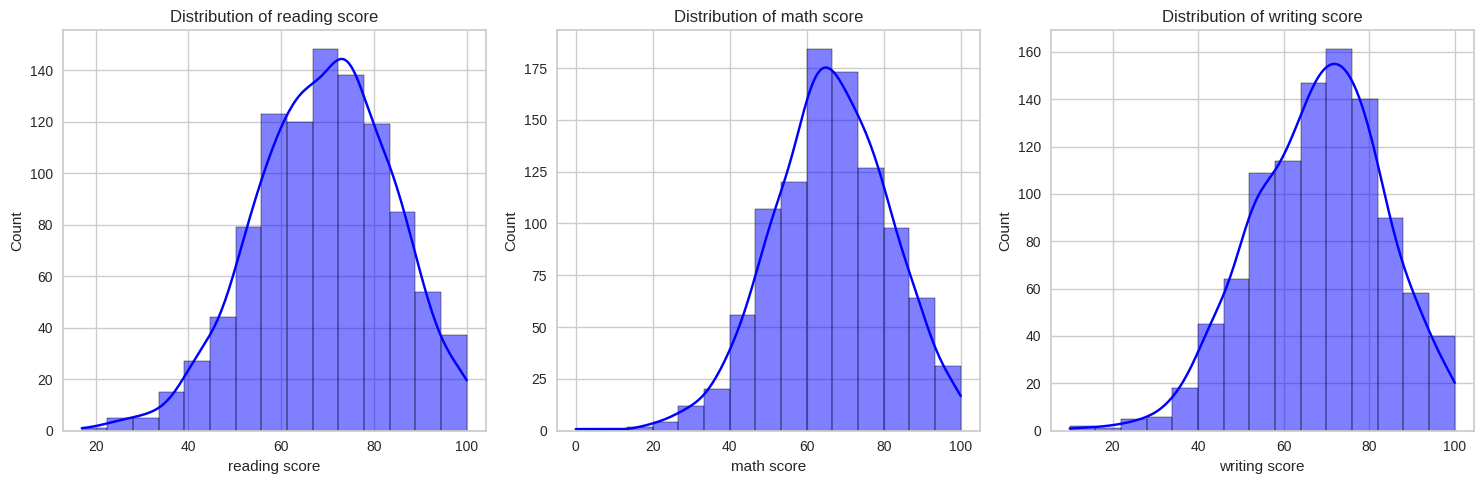

In [10]:
# Distribution Visualizations for Numerical Columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(student_df[col], kde=True, bins=15, color='blue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

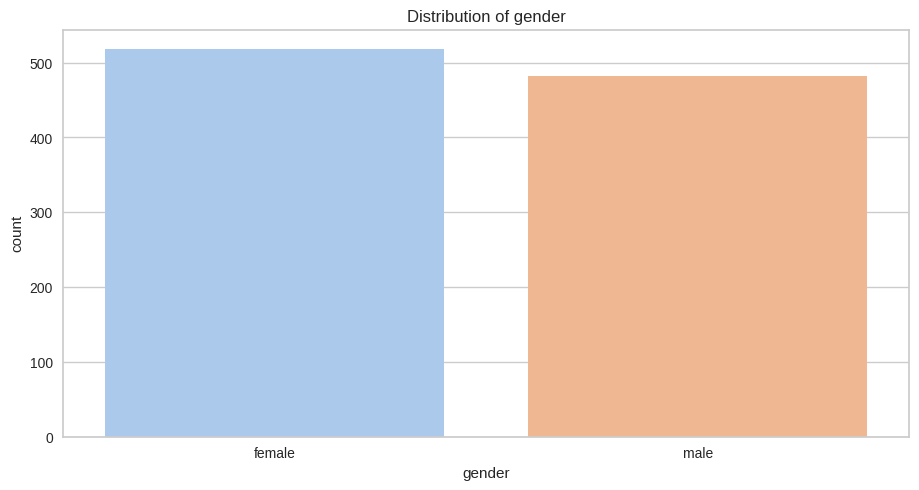

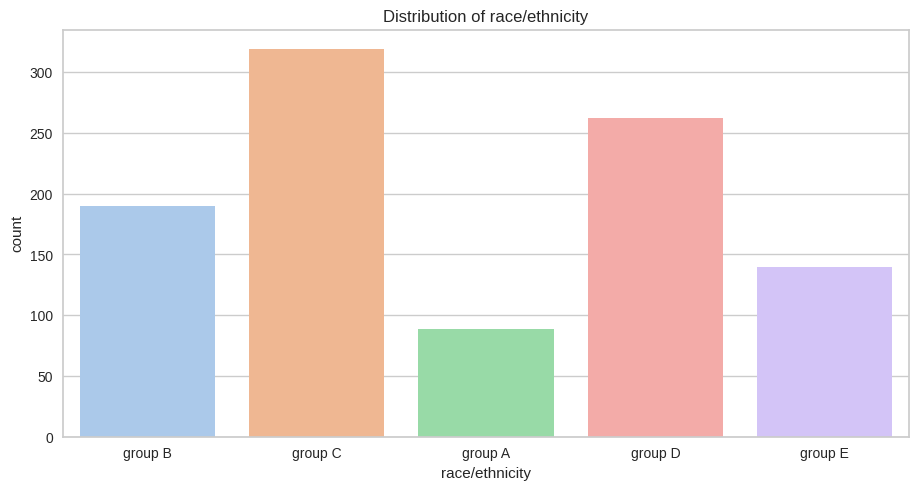

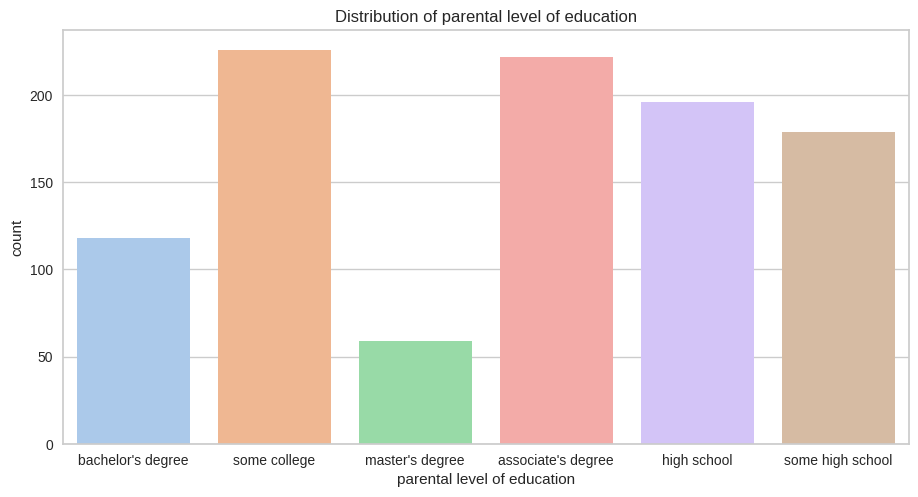

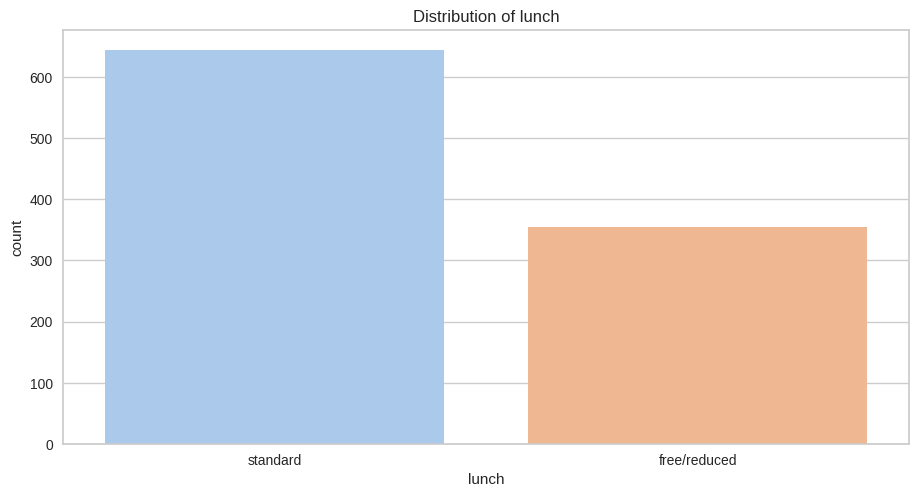

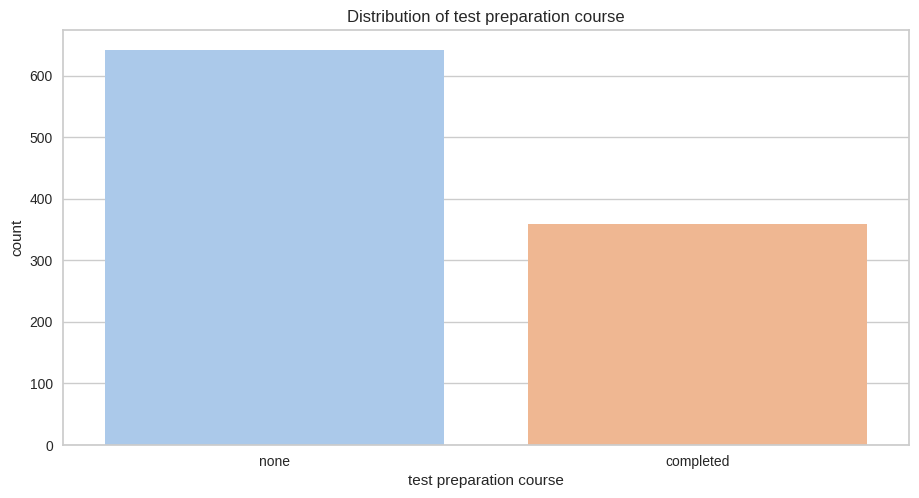

In [11]:
# Distribution Visualizations for Categoricals Columns
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for i, col in enumerate(categorical_cols):
    plt.figure(figsize=(18, 14))
    plt.subplot(3, 2, i + 1)
    sns.countplot(data=student_df, x=col, palette="pastel", hue=col, legend=False )
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

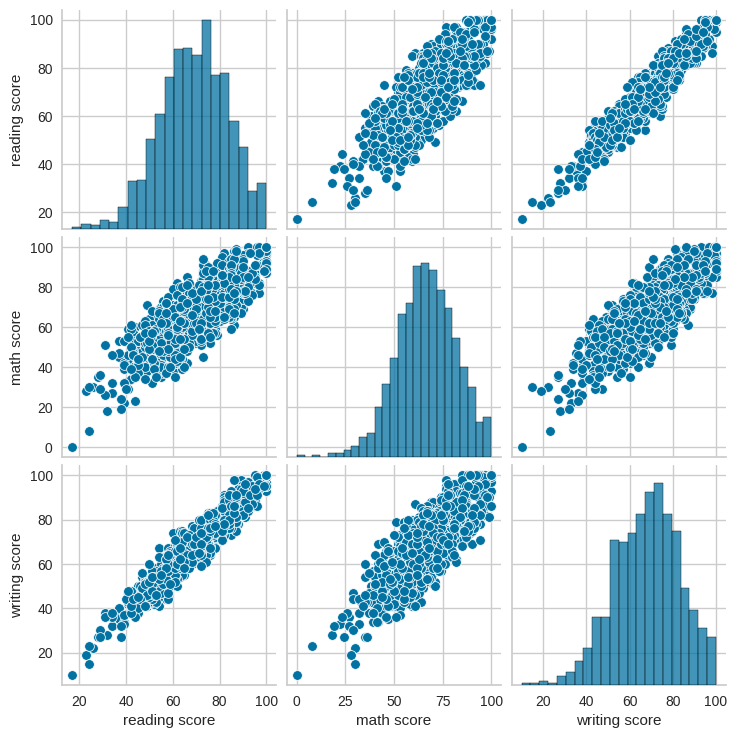

In [12]:
# Visualization Correlation with Scatter Plot
sns.pairplot(student_df[numerical_cols])
plt.show()

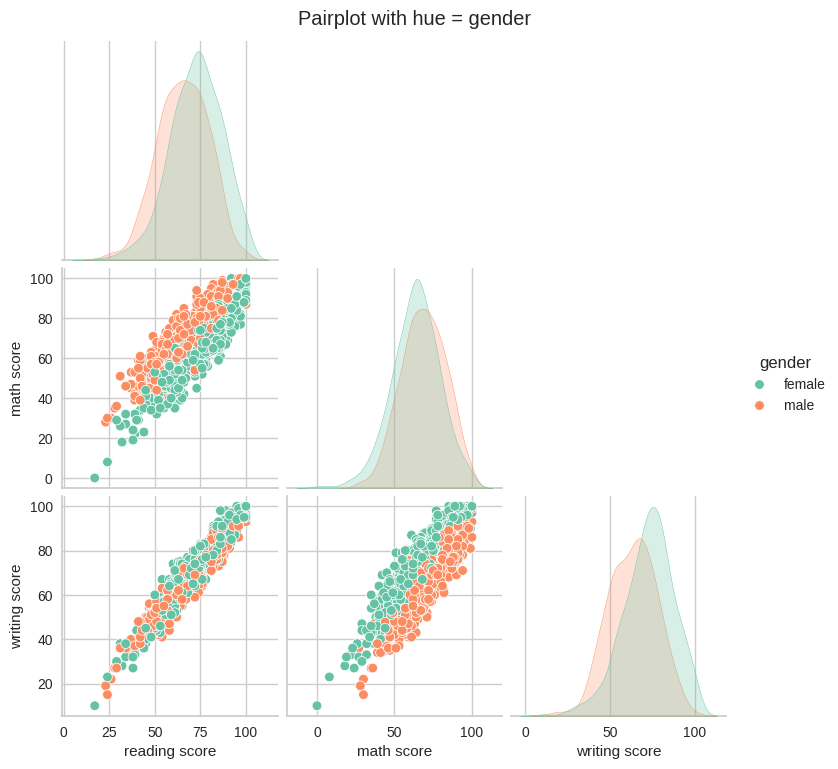

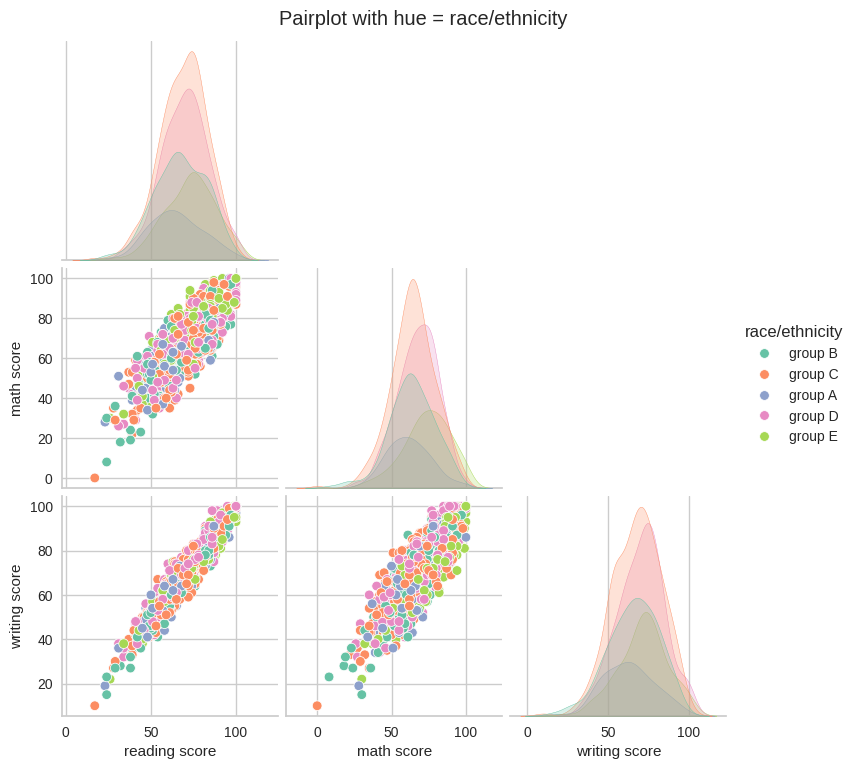

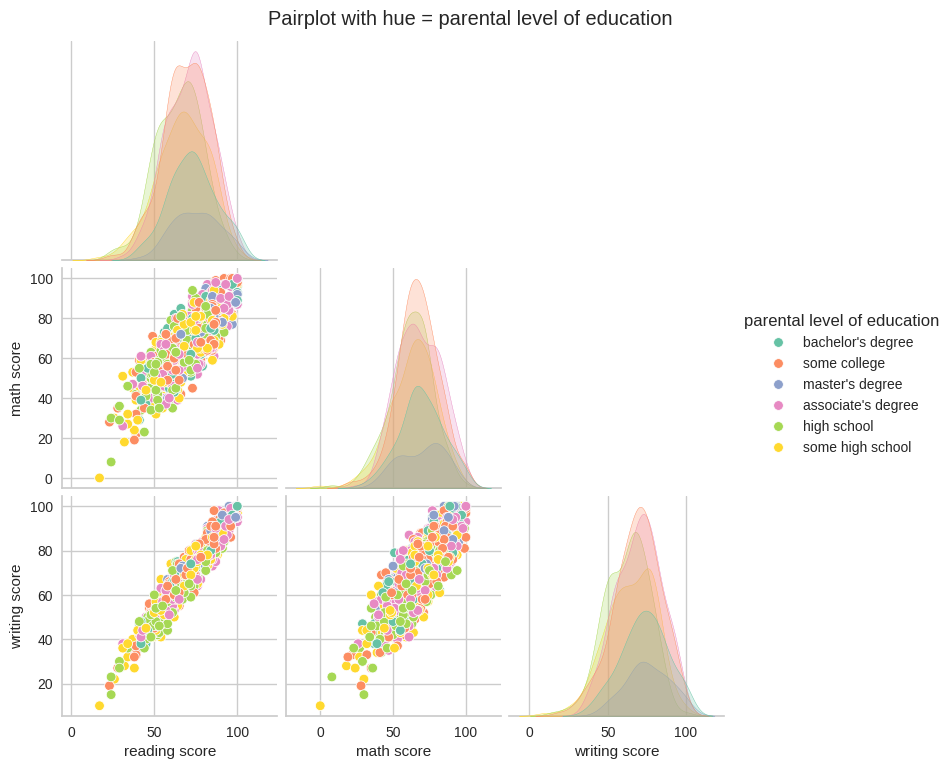

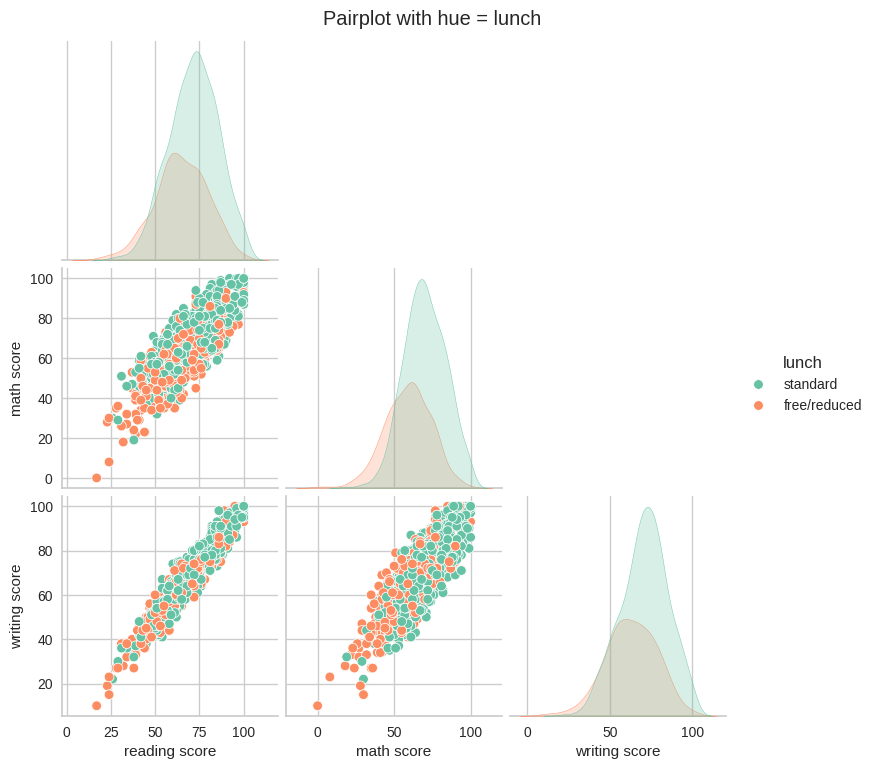

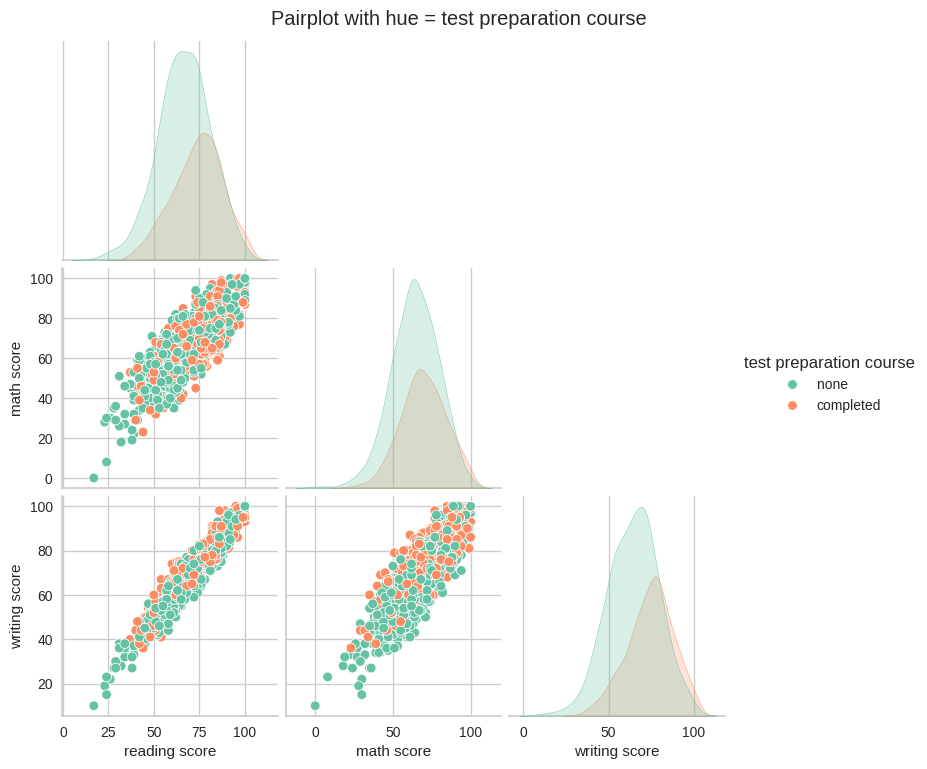

In [13]:
for cat_col in categorical_cols:
    sns.pairplot(student_df, vars=numerical_cols, hue=cat_col, palette='Set2', corner=True)
    plt.suptitle(f'Pairplot with hue = {cat_col}', y=1.02)
    plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [14]:
data_real = student_df.copy()
# Encode categorical features
categorical_cols = student_df.select_dtypes(include=['object']).columns

encoders = {}
for col in categorical_cols:
    encoder = LabelEncoder()
    student_df[col] = encoder.fit_transform(student_df[col])
    encoders[col] = encoder

student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [15]:
# Normalize numerical scores
numerical_cols = student_df.select_dtypes(include=['float64', 'int']).columns
scaler = MinMaxScaler()
student_df[numerical_cols] = scaler.fit_transform(student_df[numerical_cols])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [16]:
# Method with K-mean Clustering
kmeans = KMeans(n_clusters=6, random_state=42)

kmeans.fit(student_df[numerical_cols])

# Add cluster labels to the dataset
student_df['Cluster'] = kmeans.labels_

# Display the cluster centers
print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[ 6.10622664e-16  5.45348837e-01  4.74418605e-01  1.00000000e+00
   1.00000000e+00  6.65302326e-01  6.79349958e-01  6.99638243e-01]
 [ 1.00000000e+00  5.09036145e-01  4.61445783e-01  6.66133815e-16
   6.32530120e-01  6.24578313e-01  5.36652635e-01  5.45850067e-01]
 [ 6.10622664e-16  5.44836957e-01  5.05434783e-01  6.19565217e-01
   1.22124533e-15  6.71956522e-01  7.27409639e-01  7.64371981e-01]
 [ 5.55111512e-16  5.39915966e-01  5.22689076e-01 -5.55111512e-16
   1.00000000e+00  5.28907563e-01  5.64240154e-01  5.75350140e-01]
 [ 1.00000000e+00  5.67733990e-01  5.00492611e-01  1.00000000e+00
   1.00000000e+00  6.98325123e-01  5.74930263e-01  5.76737822e-01]
 [ 1.00000000e+00  5.48672566e-01  5.46902655e-01  1.00000000e+00
  -6.66133815e-16  7.59557522e-01  6.69900842e-01  6.88692232e-01]]


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

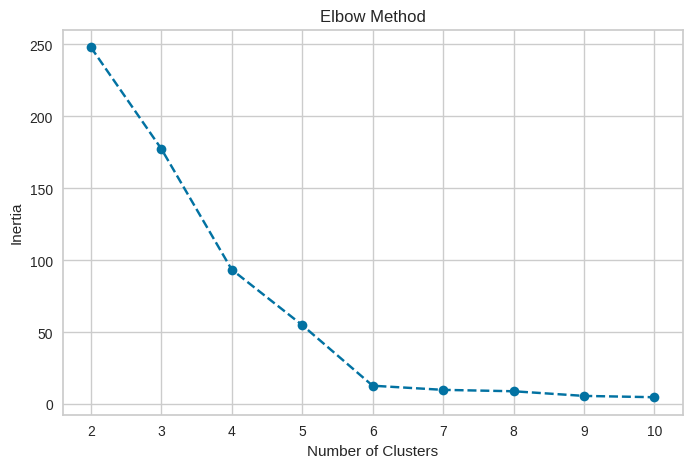

In [17]:
# Evaluate with PCA
pca = PCA(n_components=2)
data = pca.fit_transform(student_df[numerical_cols])

inertia = []
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

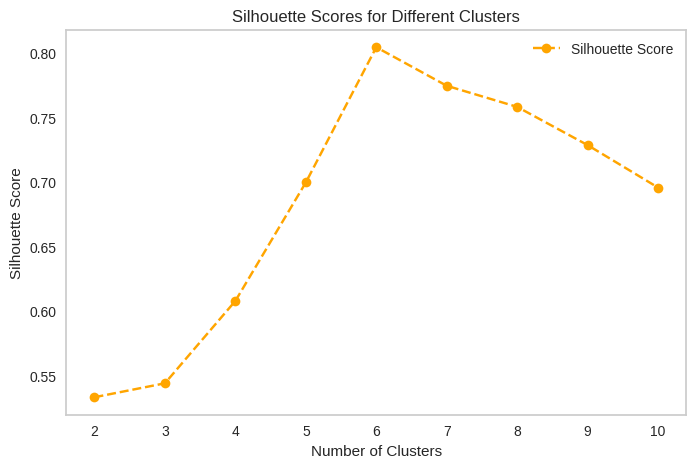

Best Silhouette Score: 0.8044499776489572


In [18]:
silhouette_scores = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data)
    silhouette_scores.append(silhouette_score(data, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--', color='orange', label='Silhouette Score')
plt.title('Silhouette Scores for Different Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid()
plt.show()
print(f"Best Silhouette Score: {max(silhouette_scores)}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [19]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

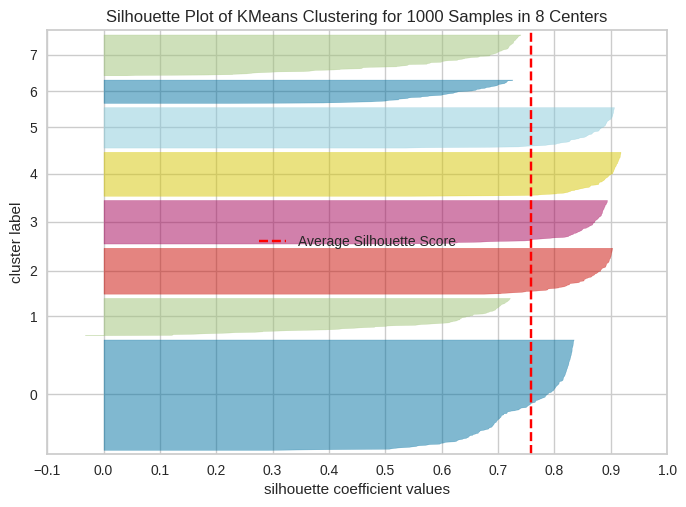

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1000 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [20]:
# Visualizations Silhouette Plot
kmeans = KMeans(random_state=42)
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', n_clusters=6)
visualizer.fit(data)
visualizer.show()

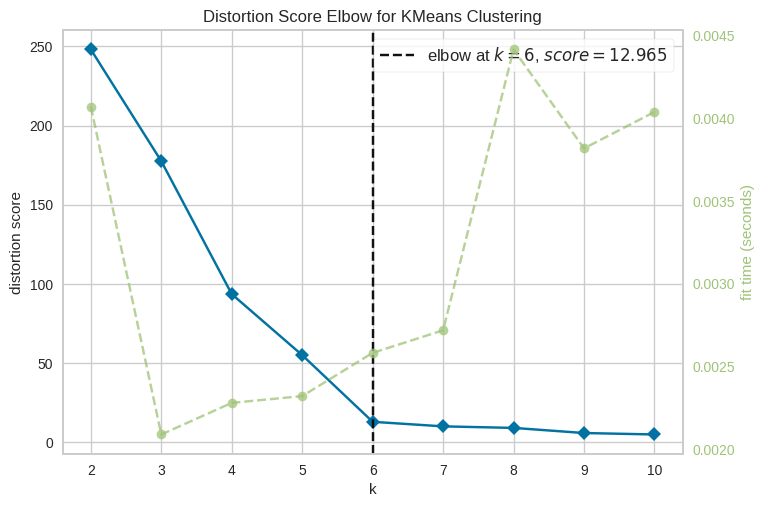

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
elbow_visualizer = KElbowVisualizer(kmeans, k=(2, 11))
elbow_visualizer.fit(data)
elbow_visualizer.show()

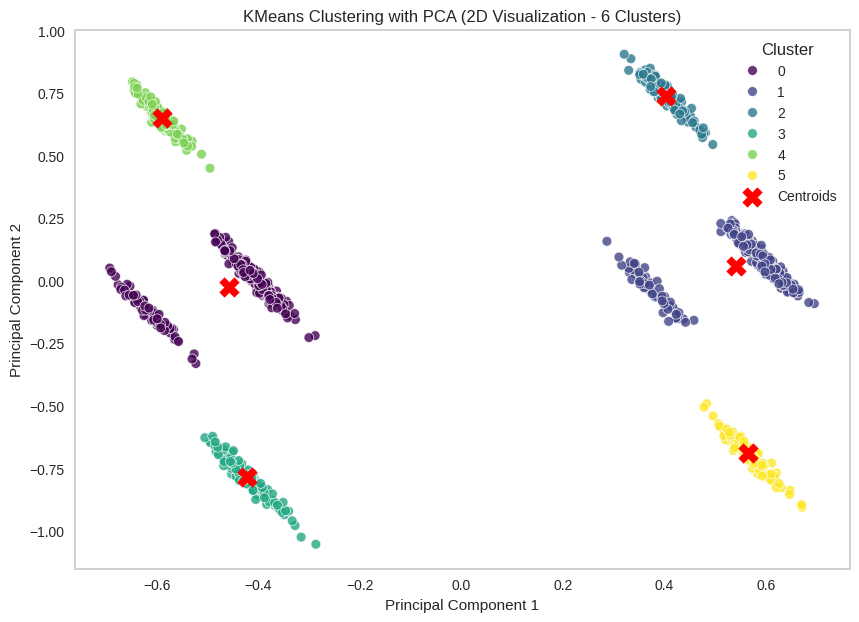

In [22]:
# Visualization K-Means Clustering with 2D Visualization
best_k = 6
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(data)

# Visualize Clustering Results
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=data[:, 0],
    y=data[:, 1],
    hue=labels,
    palette='viridis',
    s=50,
    alpha=0.8
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    color='red',
    s=200,
    marker='X',
    label='Centroids'
)
plt.title('KMeans Clustering with PCA (2D Visualization - 6 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?


Cluster Characteristics:
         math score  reading score  writing score
Cluster                                          
0         66.530233      73.386047      72.967442
1         62.457831      61.542169      59.126506
2         67.195652      77.375000      78.793478
3         52.890756      63.831933      61.781513
4         69.832512      64.719212      61.906404
5         75.955752      72.601770      71.982301
Cluster 0:
  Size: 215
  Numerical Statistics:
        math score  reading score  writing score
mean     66.530233      73.386047      72.967442
median   65.000000      72.000000      73.000000
std      13.792446      13.124308      13.106817
min      19.000000      29.000000      30.000000
max     100.000000     100.000000     100.000000


Cluster 1:
  Size: 166
  Numerical Statistics:
        math score  reading score  writing score
mean     62.457831      61.542169      59.126506
median   62.000000      61.000000      59.000000
std      14.012809      13.777717    

<ipython-input-23-5748755ab032>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_real, x='Cluster', palette='viridis')


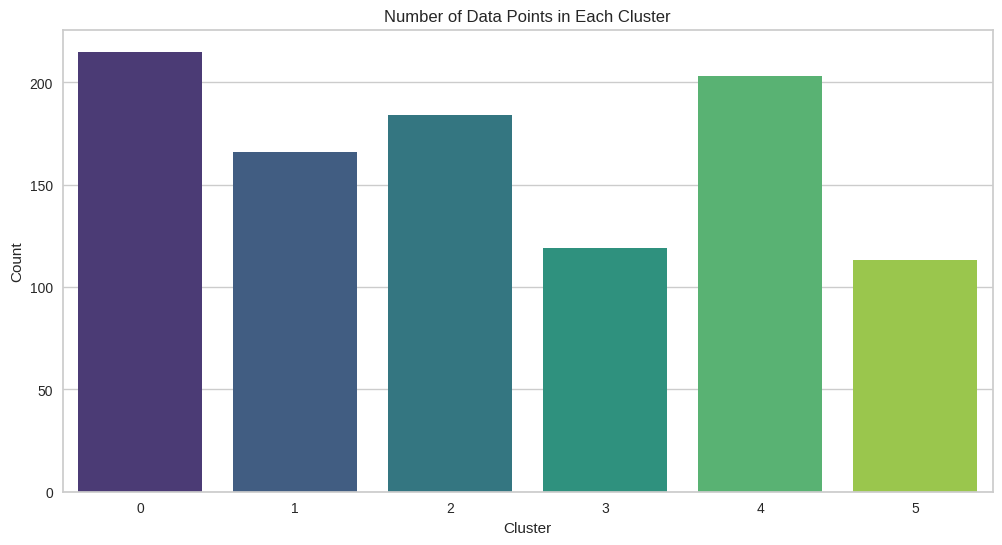

<Figure size 1400x800 with 0 Axes>

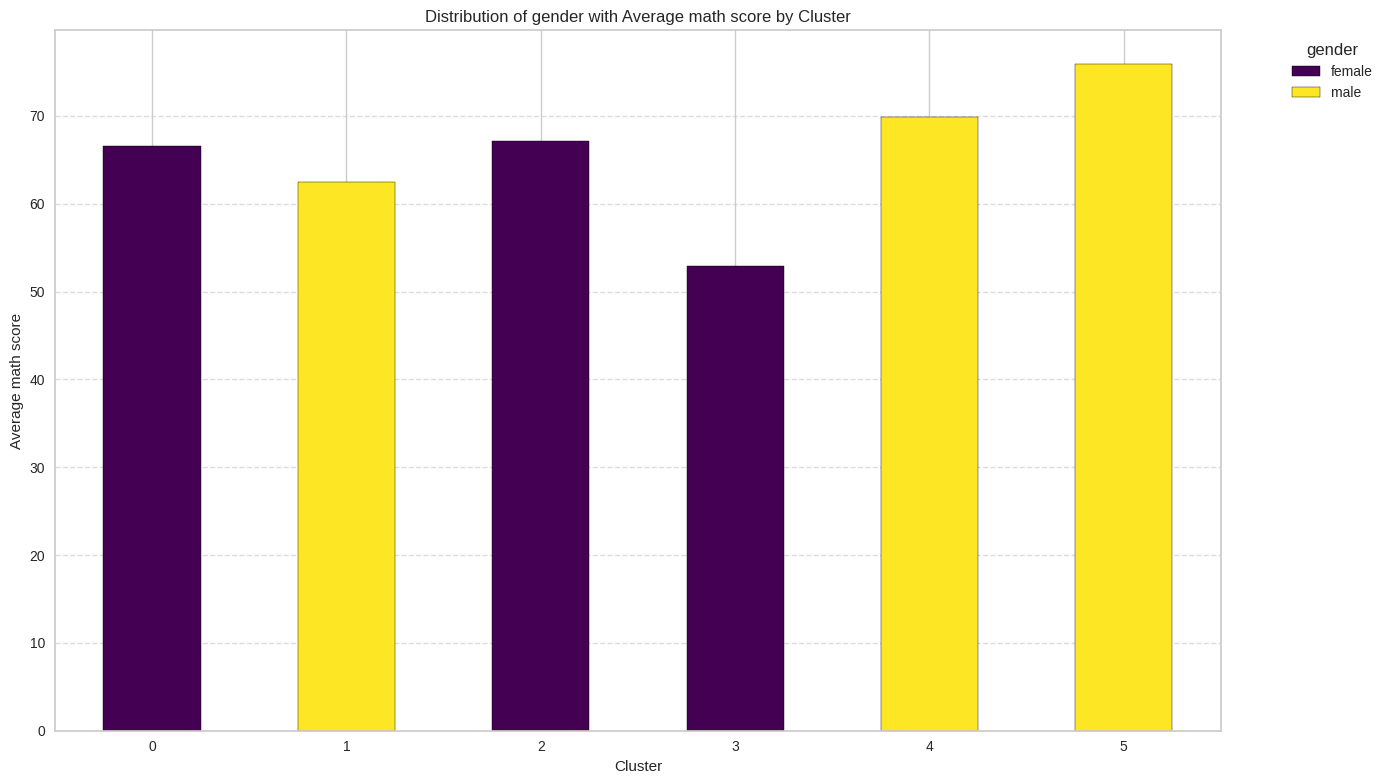

<Figure size 1400x800 with 0 Axes>

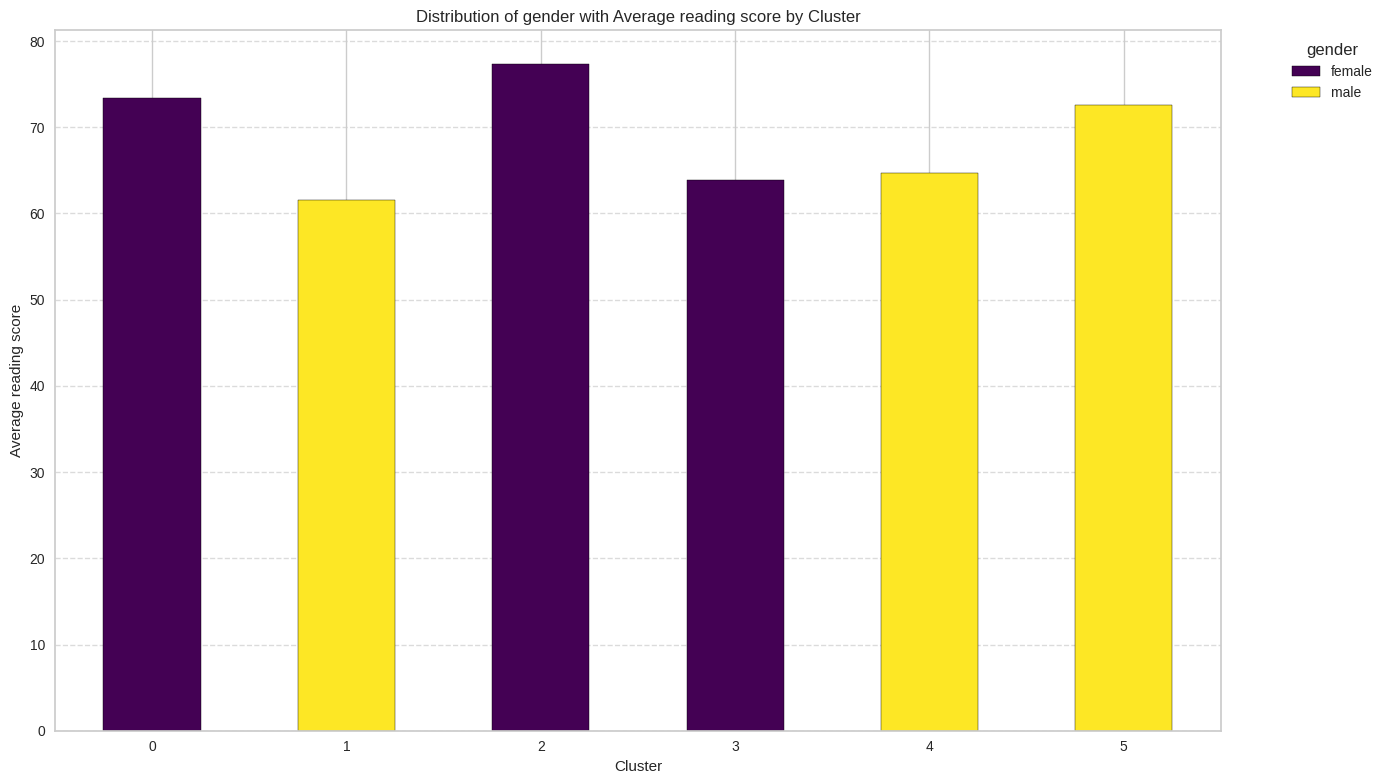

<Figure size 1400x800 with 0 Axes>

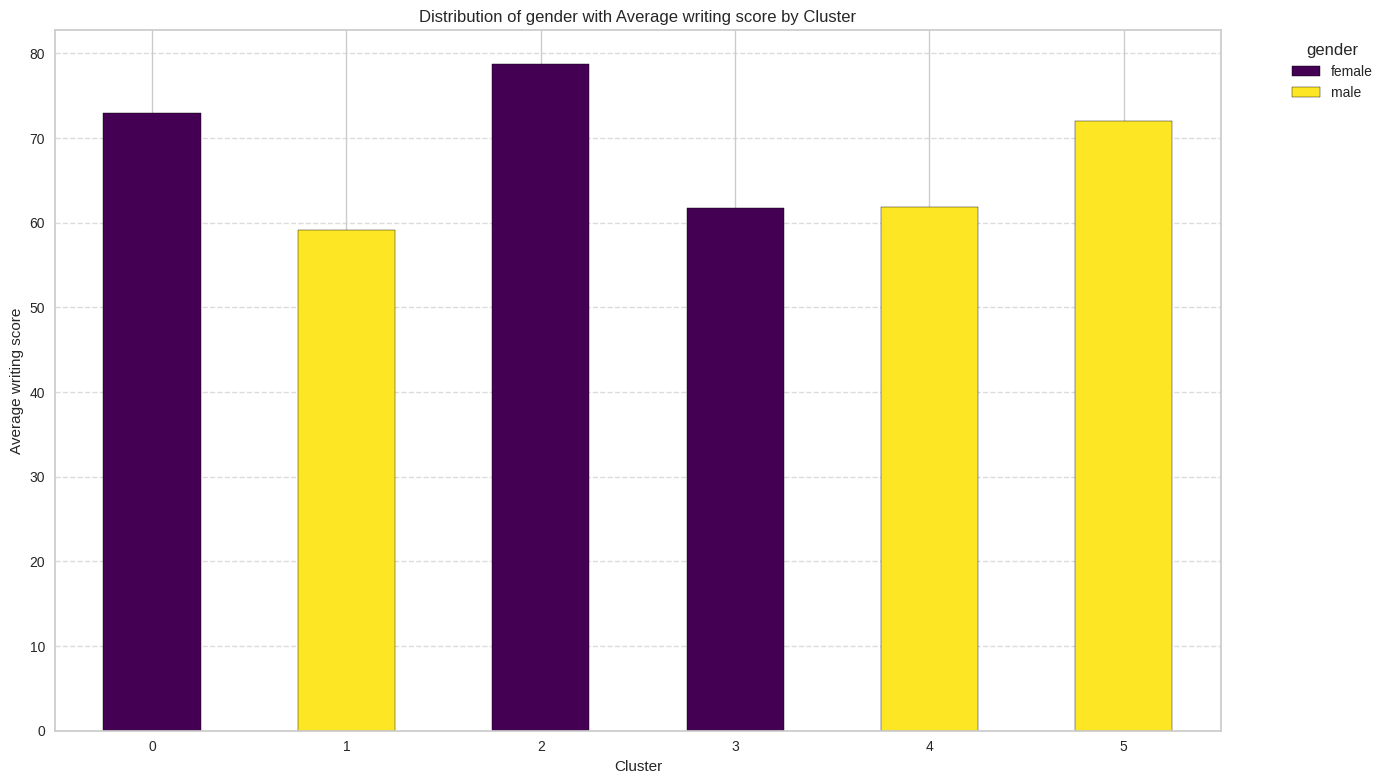

<Figure size 1400x800 with 0 Axes>

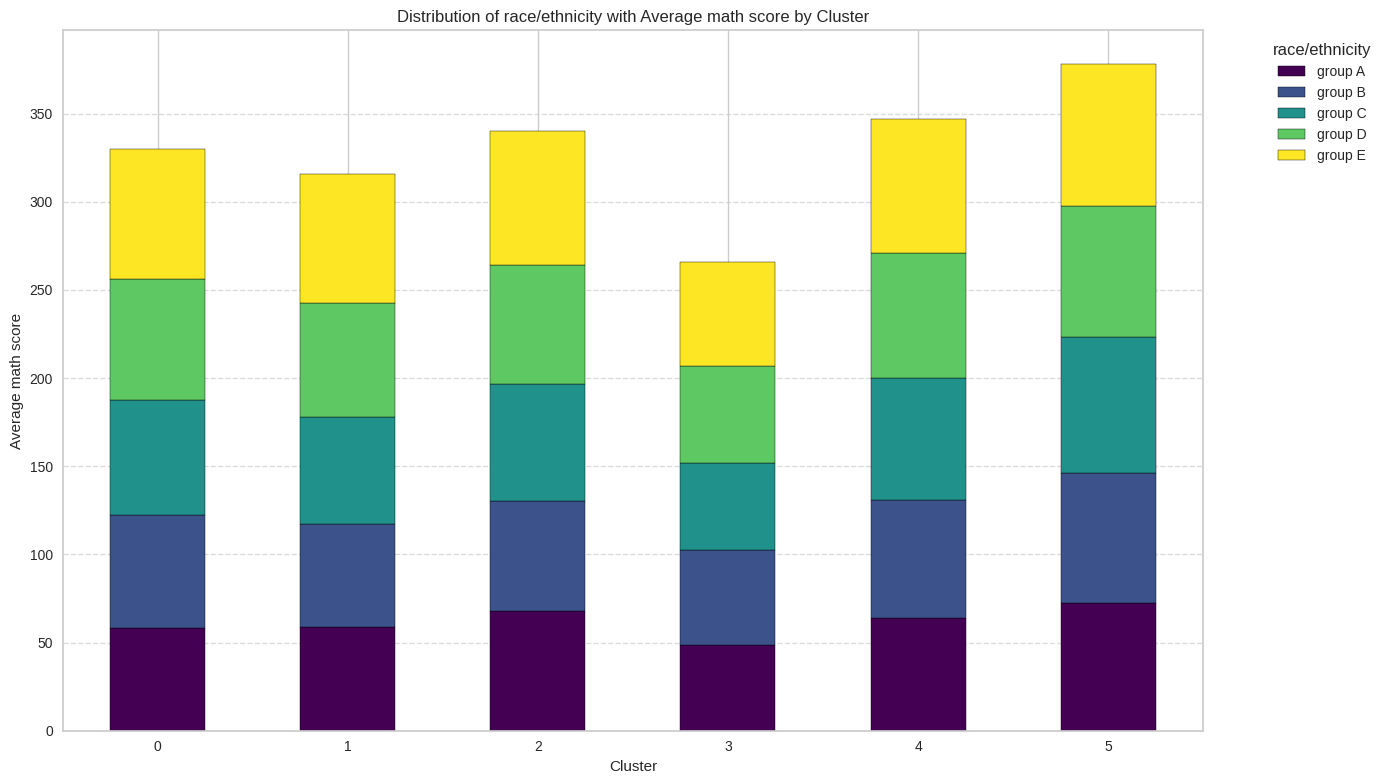

<Figure size 1400x800 with 0 Axes>

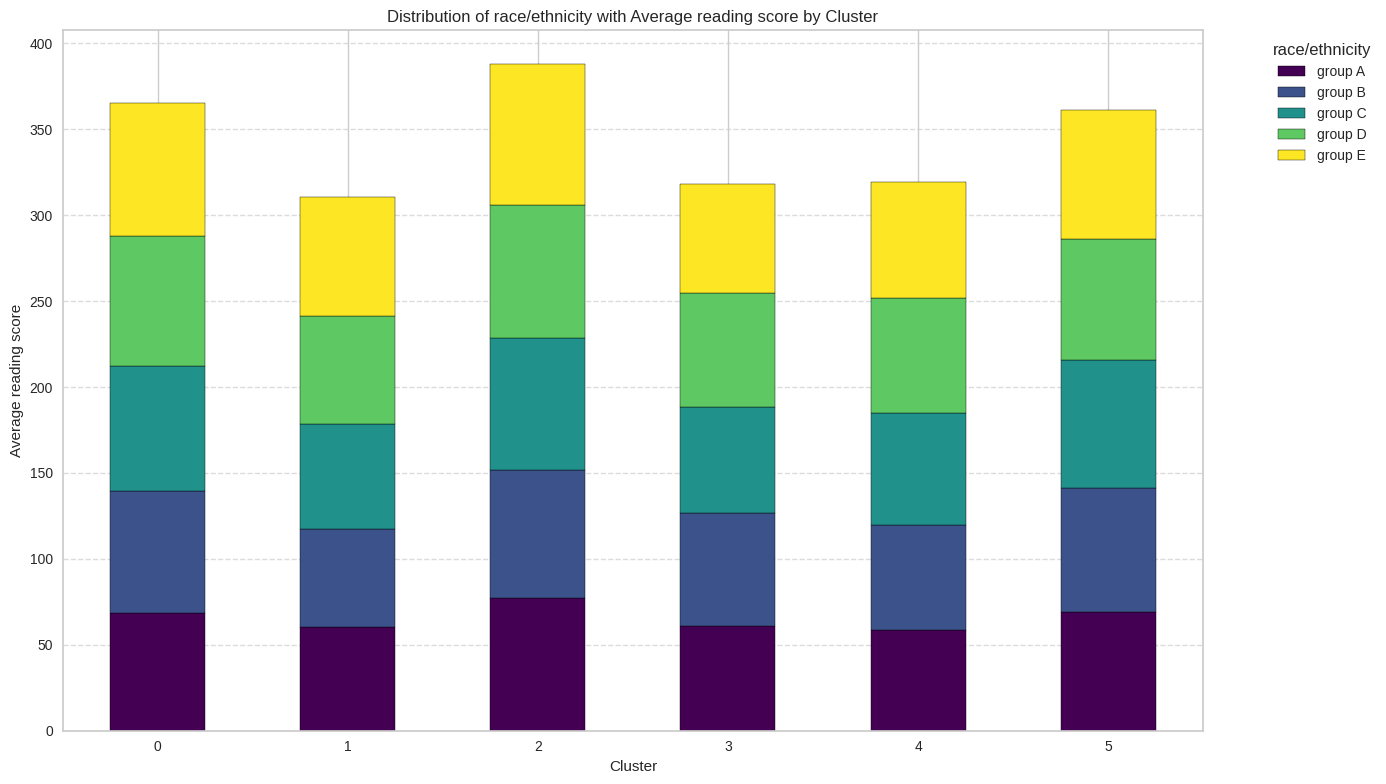

<Figure size 1400x800 with 0 Axes>

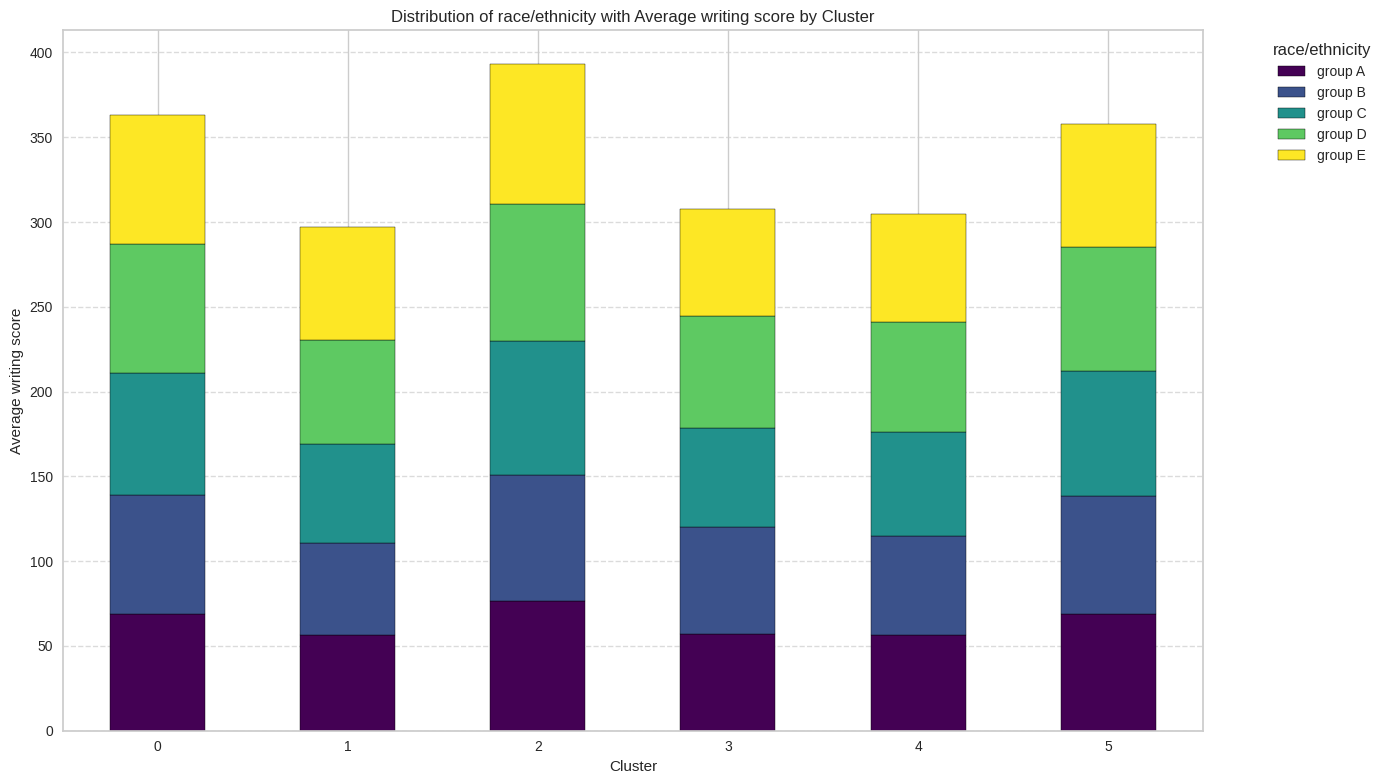

<Figure size 1400x800 with 0 Axes>

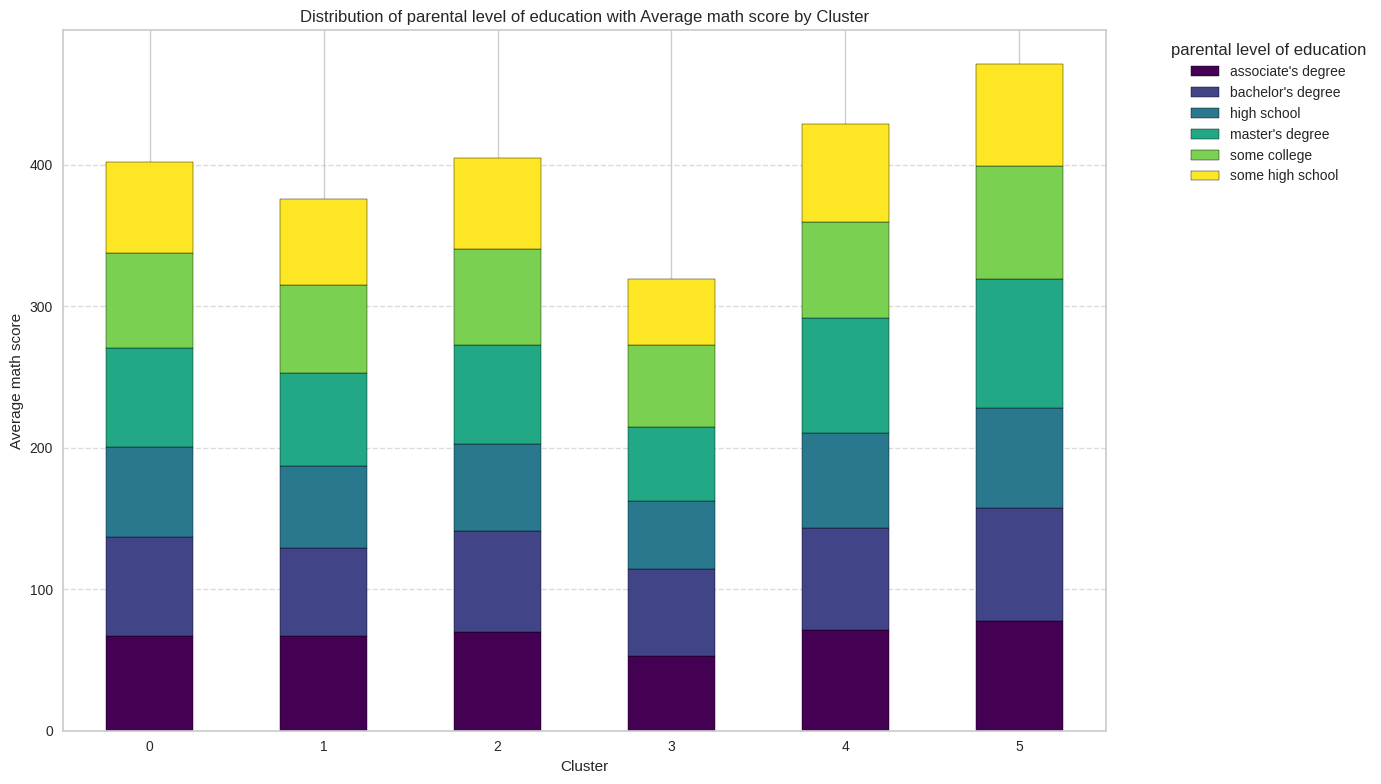

<Figure size 1400x800 with 0 Axes>

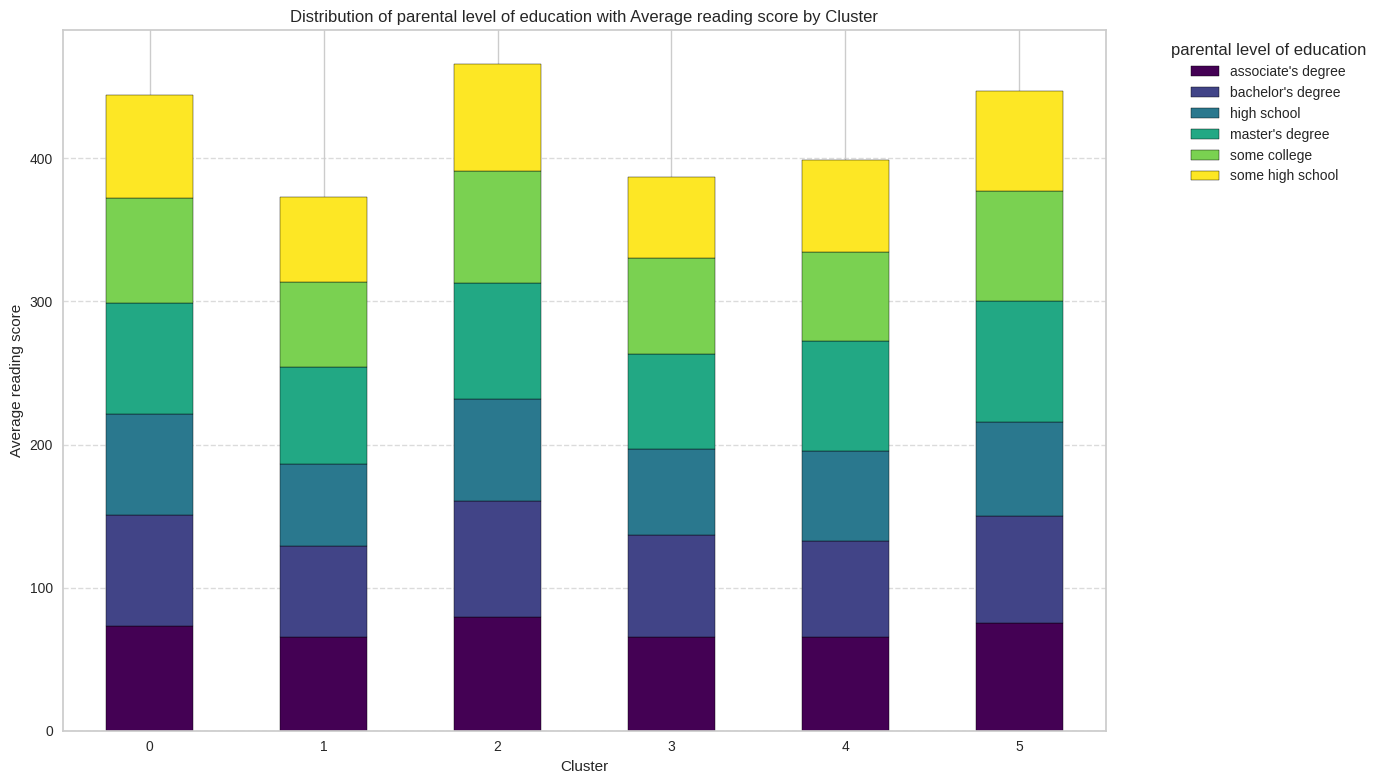

<Figure size 1400x800 with 0 Axes>

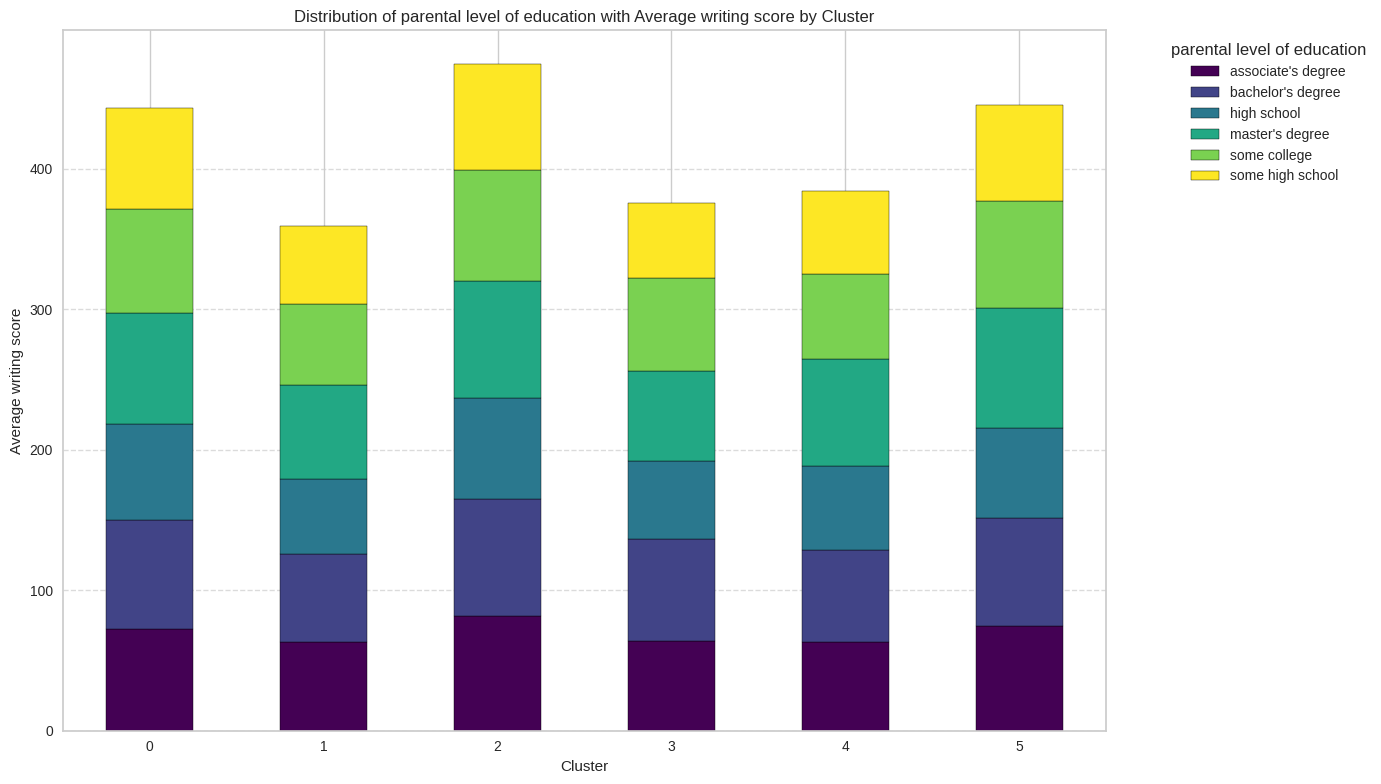

<Figure size 1400x800 with 0 Axes>

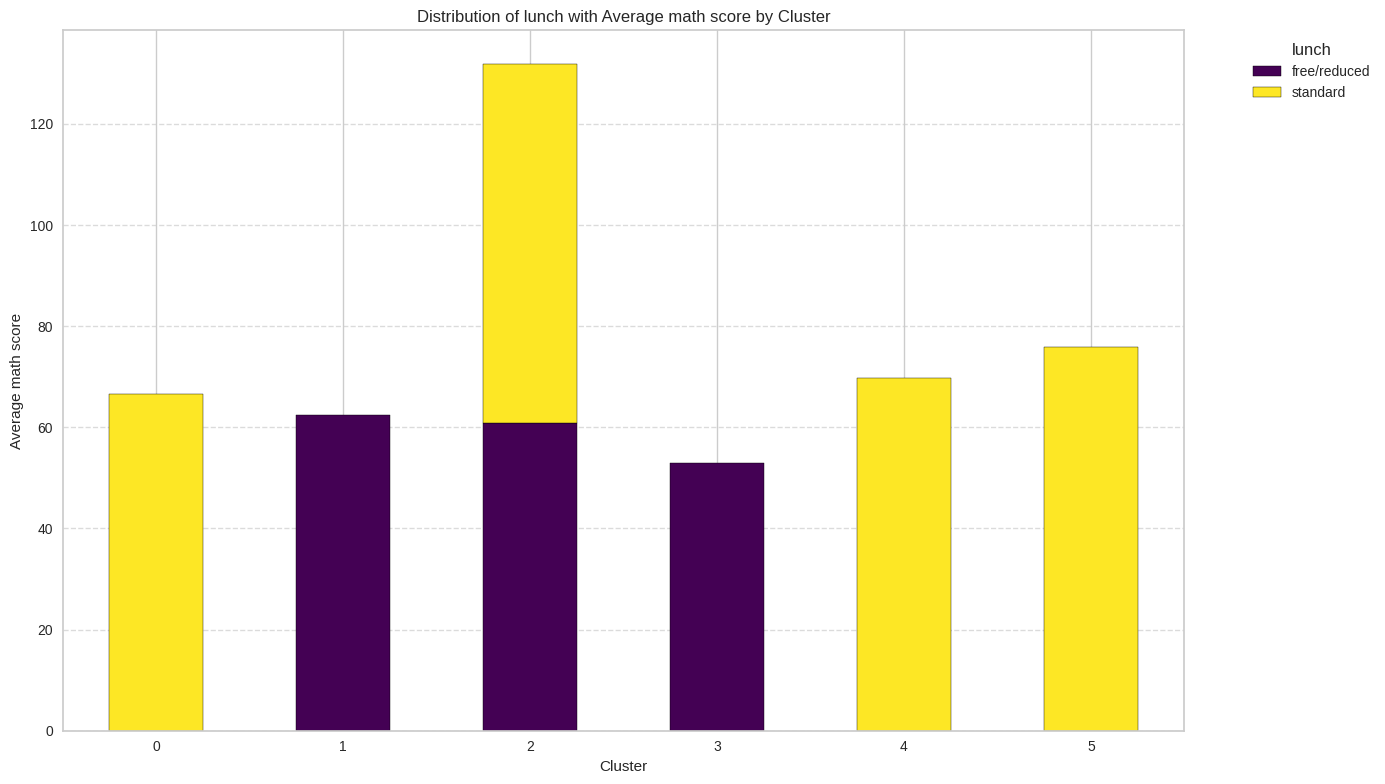

<Figure size 1400x800 with 0 Axes>

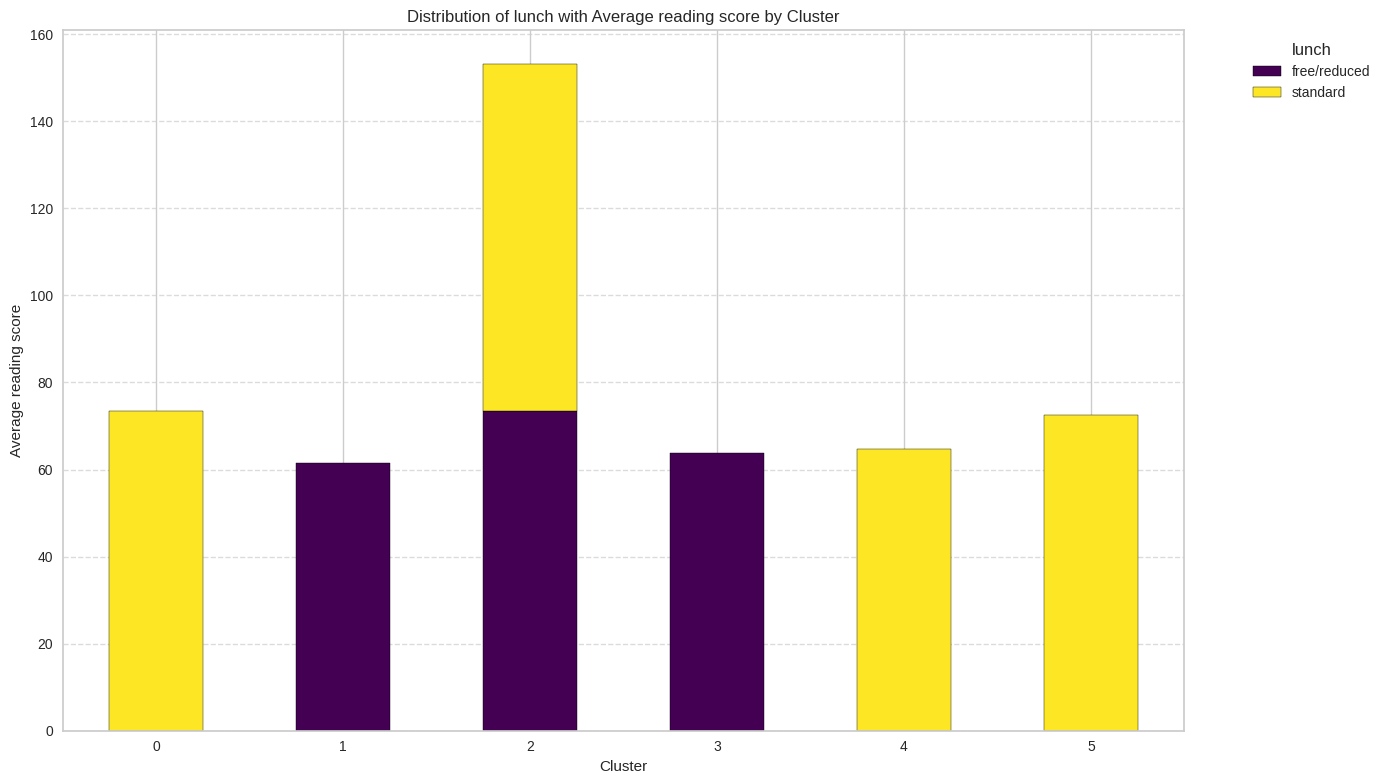

<Figure size 1400x800 with 0 Axes>

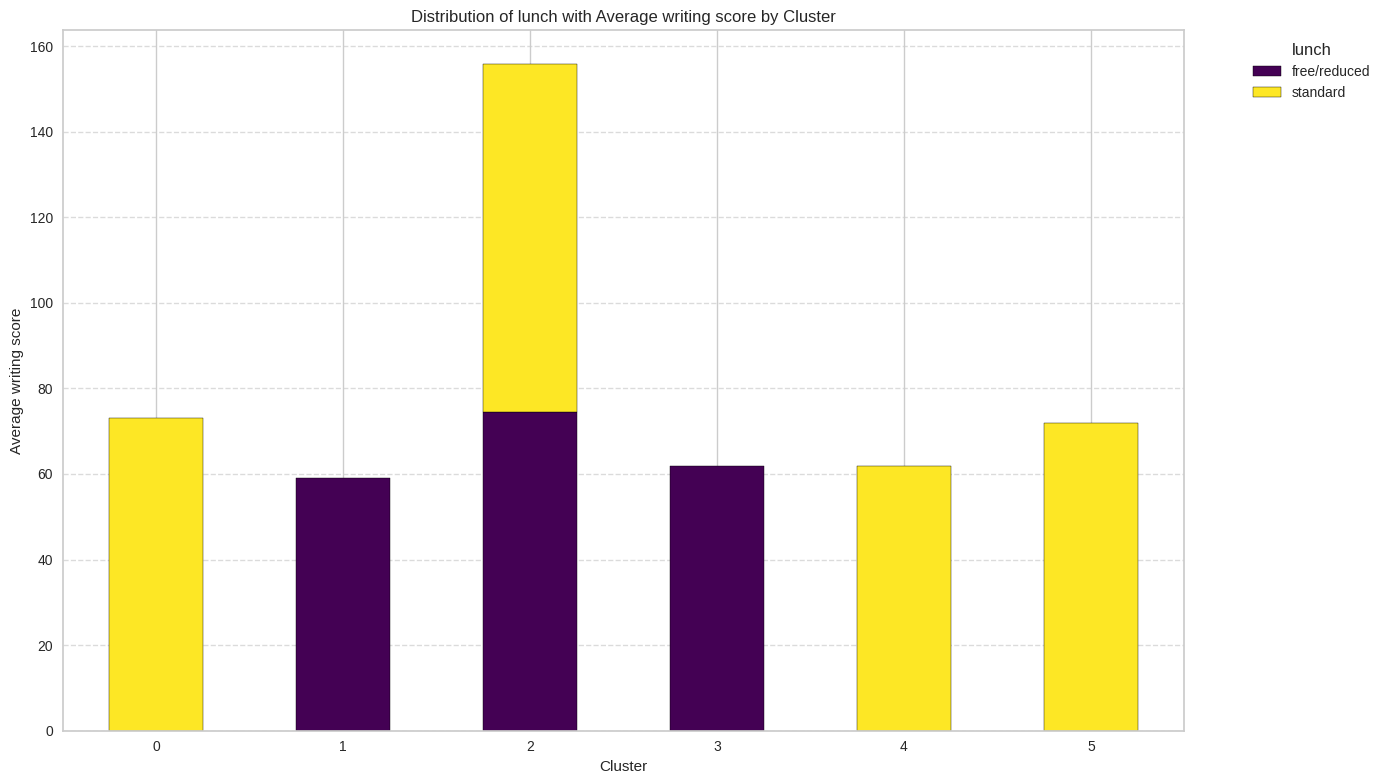

<Figure size 1400x800 with 0 Axes>

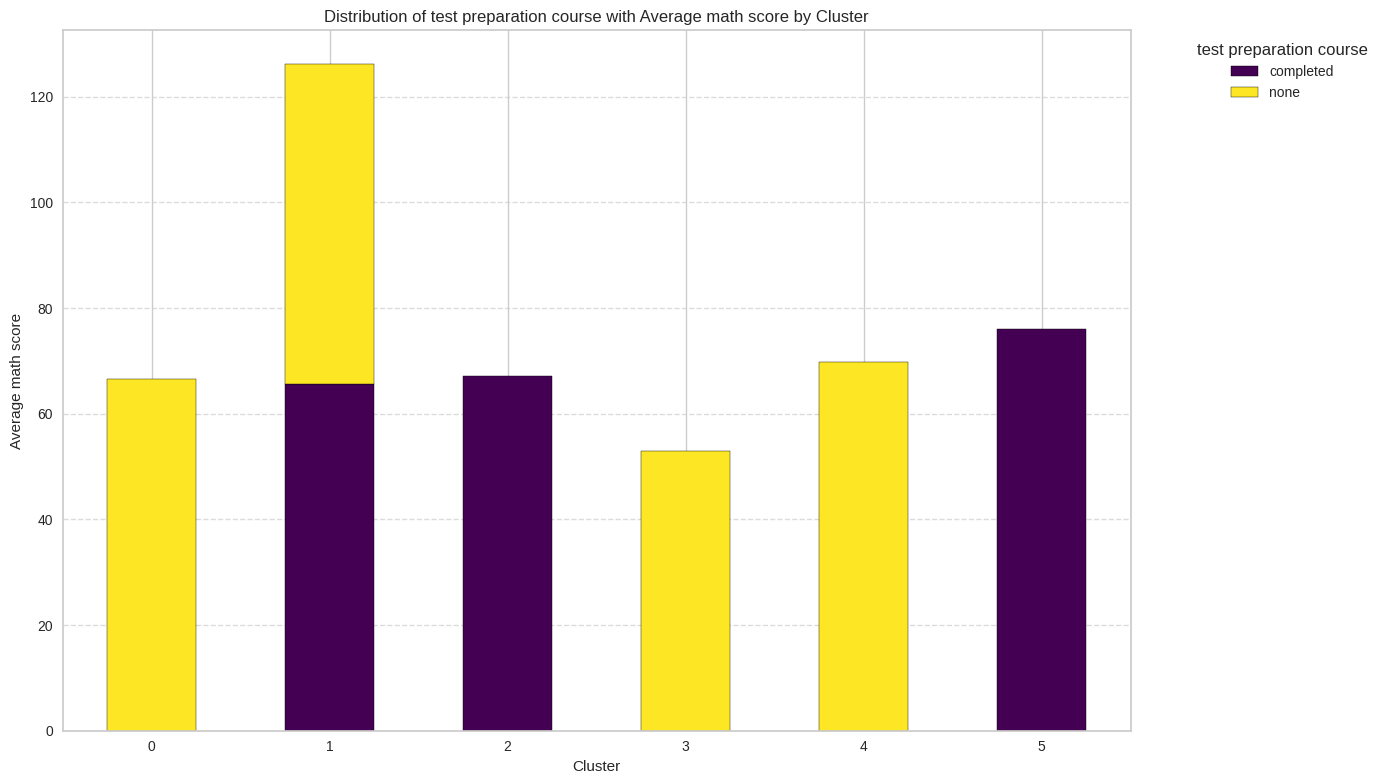

<Figure size 1400x800 with 0 Axes>

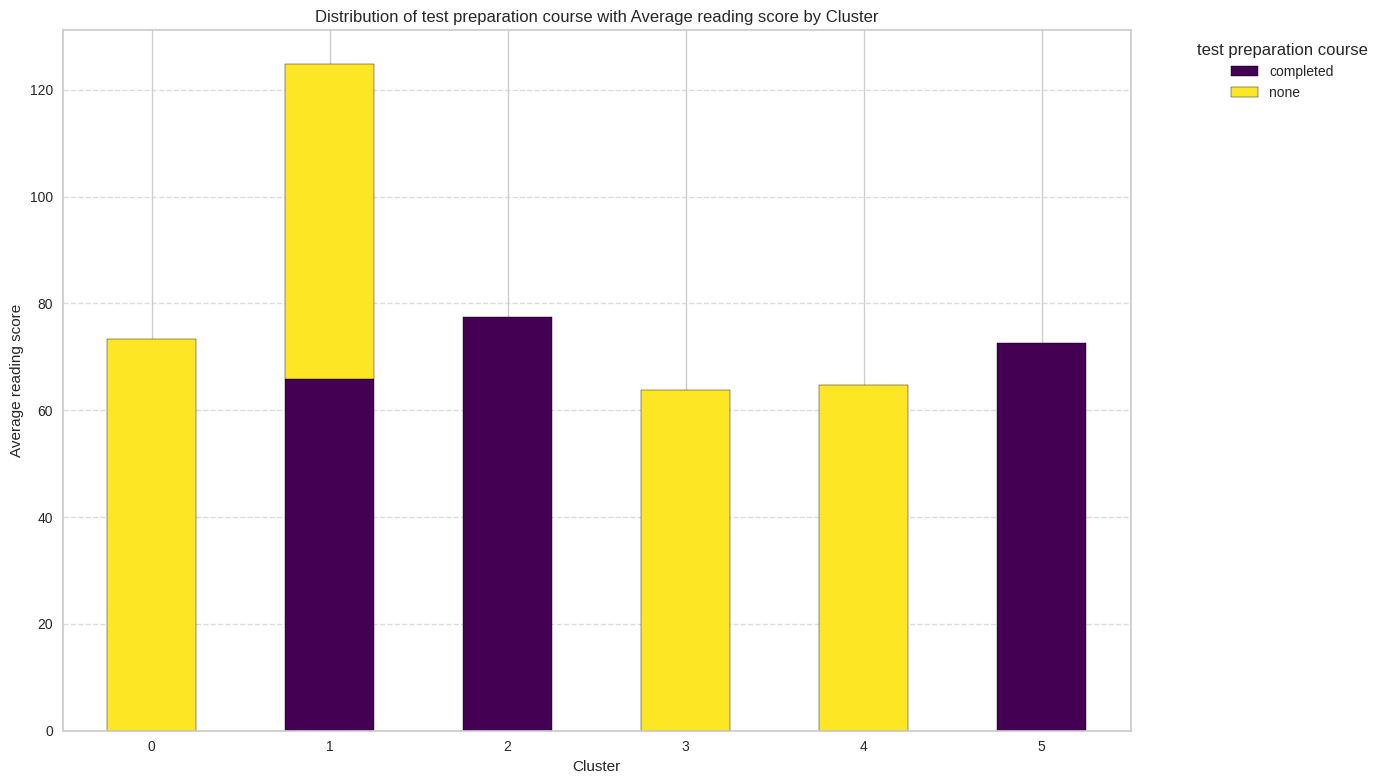

<Figure size 1400x800 with 0 Axes>

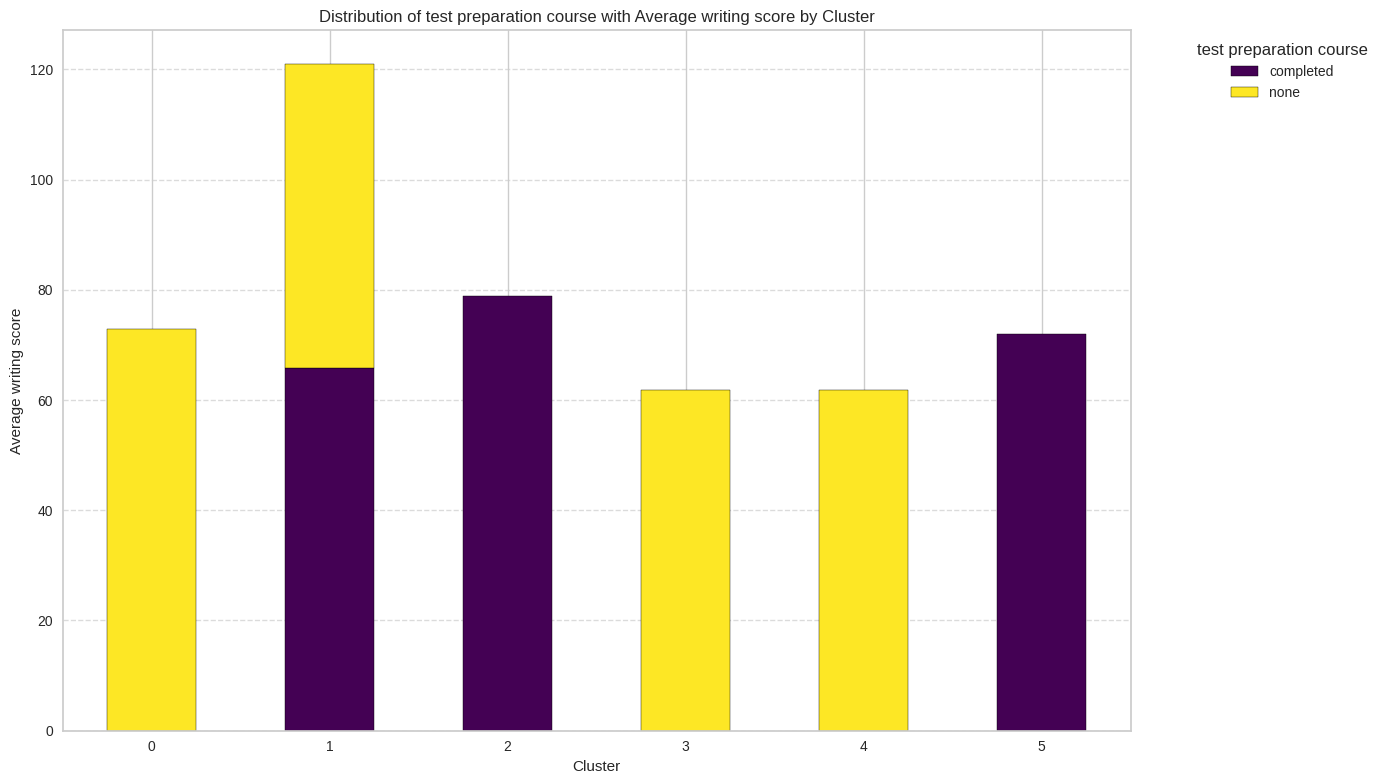


Number of data points in each cluster:
Cluster
0    215
1    166
2    184
3    119
4    203
5    113
Name: count, dtype: int64


In [23]:
numerical_cols = ['math score', 'reading score', 'writing score']

np.random.seed(42)
data_real['Cluster'] = np.random.randint(0, 6, size=len(student_df))
clustering_data = student_df.copy()
for col, encoder in encoders.items():
    if student_df[col].dtype == 'object':
        continue
    # Apply inverse_transform to the specific encoded column only
    student_df[col] = encoder.inverse_transform(student_df[col].astype(int))

data_real['Cluster'] = student_df['Cluster']

each_cluster = data_real.groupby('Cluster')[numerical_cols].mean()
print("\nCluster Characteristics:")
print(each_cluster)

cluster_characteristics = []
for cluster_id in range(best_k):
    # Select data points belonging to the current cluster
    cluster_data = data_real[data_real['Cluster'] == cluster_id]

    # Numerical statistics (only for numeric columns)
    numerical_stats = cluster_data[numerical_cols].agg(['mean', 'median', 'std', 'min', 'max'])

    # Save cluster information
    cluster_characteristics.append({
        "Cluster": cluster_id,
        "Size": len(cluster_data),
        "Numerical Stats": numerical_stats
    })

# Print cluster characteristics
for cluster in cluster_characteristics:
    print(f"Cluster {cluster['Cluster']}:")
    print(f"  Size: {cluster['Size']}")
    print(f"  Numerical Statistics:")
    print(cluster['Numerical Stats'])
    print("\n")

# Visualize distribution of data by cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=data_real, x='Cluster', palette='viridis')
plt.title("Number of Data Points in Each Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

# Visualize numerical data distributions per cluster with bar plots
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        # Group data by cluster and categorical column, calculate the mean of the numerical column
        cluster_grouped = data_real.groupby(['Cluster', cat_col])[num_col].mean().unstack()

        # Create a bar plot
        plt.figure(figsize=(14, 8))
        cluster_grouped.plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black', figsize=(14, 8))
        plt.title(f"Distribution of {cat_col} with Average {num_col} by Cluster")
        plt.xlabel("Cluster")
        plt.ylabel(f"Average {num_col}")
        plt.legend(title=cat_col, bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=0)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

# Display count of data points in each cluster
cluster_counts = data_real['Cluster'].value_counts().sort_index()
print("\nNumber of data points in each cluster:")
print(cluster_counts)

**Interpretasinya Tiap Cluster :.**
1. **Cluster 0 :**
- **Rata-rata skor matematika: 65.12 (sedang)**
- **Rata-rata skor membaca: 73.40 (cukup tinggi)**
- **Rata-rata skor menulis: 73.31 (cukup tinggi)**

**Interpretasi :**
  Cluster ini mungkin terdiri dari siswa dengan kemampuan menulis dan membaca yang baik, namun kemampuan matematikanya relatif lebih rendah. Terdapatnya dominasi oleh gender perempuan dimana mungkin perlu menunjukkan kebutuhan pendekatan khusus berdasarkan gender.

2. **Cluster 1 :**
- **Rata-rata skor matematika: 68.86 (sedang)**
- **Rata-rata skor membaca: 64.97 (sedang)**
- **Rata-rata skor menulis: 62.79 (sedang)**

**Interpretasi :**
  Cluster ini menunjukkan kelompok siswa dengan performa sedang di semua aspek. Tidak ada keterampilan yang menonjol maupun terlalu lemah. Terdapatnya kebutuhan dukungan peningkatan pada setiap mata pelajaran.

3. **Cluster 2 :**
- **Rata-rata skor matematika: 75.96 (tinggi)**
- **Rata-rata skor membaca: 72.60 (cukup tinggi)**
- **Rata-rata skor menulis: 71.98 (cukup tinggi)**

**Interpretasi :**
 Cluster ini terdiri dari siswa berprestasi tinggi, hal ini terlihat dalam dominasi siswa dengan latar belakang pendidikan orang tua yang lebih baik menunjukkan dampak positif pendidikan keluarga.

4. **Cluster 3 :**
- **Rata-rata skor matematika: 52.89 (rendah)**
- **Rata-rata skor membaca: 63.83 (sedang)**
- **Rata-rata skor menulis: 61.78 (sedang)**

**Interpretasi :**
 Cluster ini menunjukkan siswa dengan kemampuan matematika rendah, meskipun membaca dan menulisnya berada pada tingkat sedang. Terdapatnya dominasi dari free/reduced lunch ,kemungkinan keterbatasan ekonomi tampaknya memengaruhi performa.

5. **Cluster 4 :**
- **Rata-rata skor matematika: 71.13 (cukup tinggi)**
- **Rata-rata skor membaca: 79.80 (tinggi)**
- **Rata-rata skor menulis: 81.51 (tinggi)**

**Interpretasi :**
 Cluster ini terdiri dari siswa dengan kinerja tinggi di membaca dan menulis, serta cukup baik di matematika.  Dukungan dari latar belakang pendidikan tinggi orang tua tampaknya signifikan.

6. **Cluster 5 :**
- **Rata-rata skor matematika: 60.61 (rendah)**
- **Rata-rata skor membaca: 59.08 (rendah)**
- **Rata-rata skor menulis: 55.29 (rendah)**

**Interpretasi :**
 Cluster ini menunjukkan siswa dengan performa rendah di semua aspek.Keterbatasan ekonomi dan latar belakang pendidikan orang tua yang lebih rendah tampaknya sangat berpengaruh.





# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [24]:
clustering_data.to_csv('next_classification.csv', index=False)